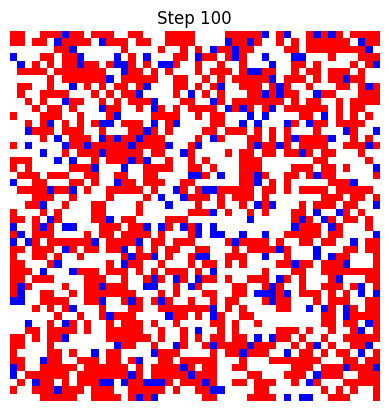

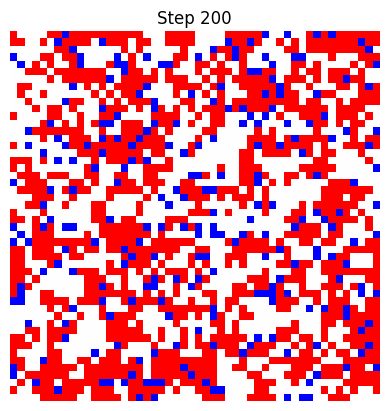

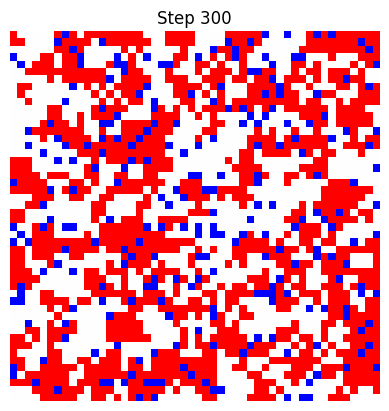

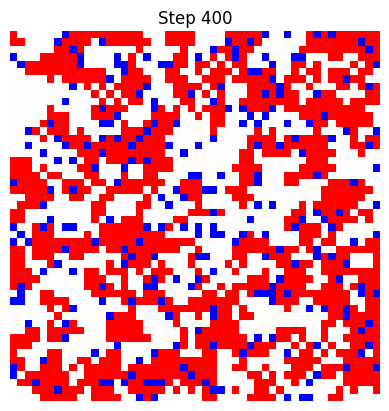

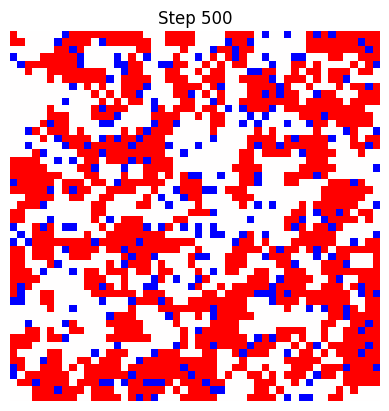

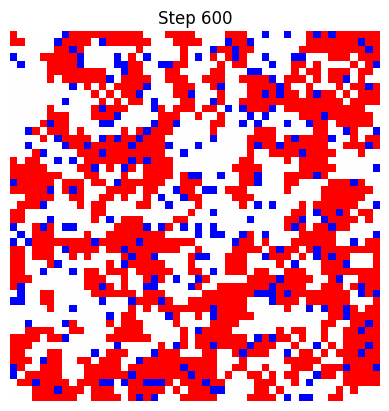

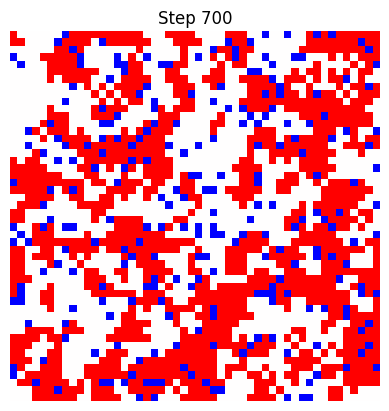

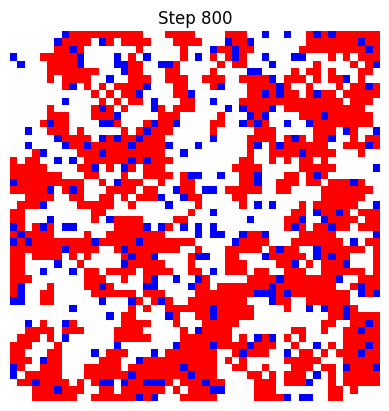

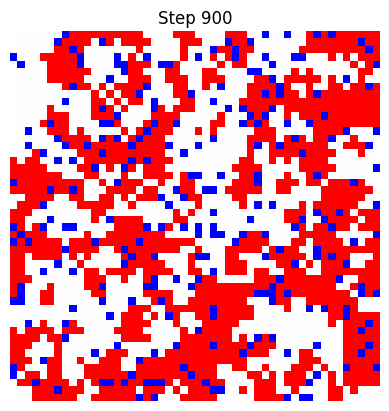

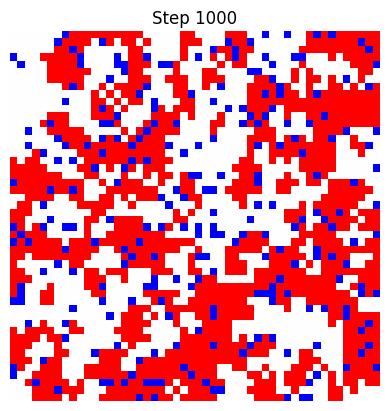

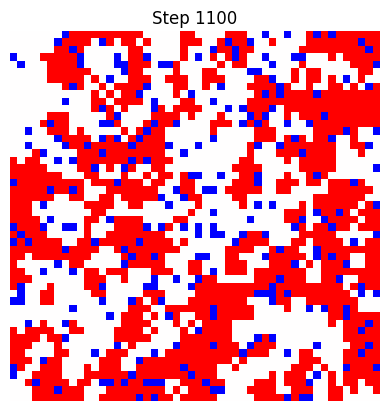

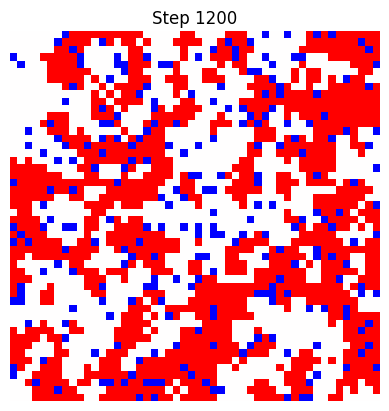

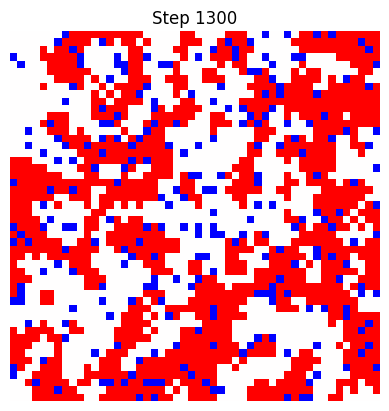

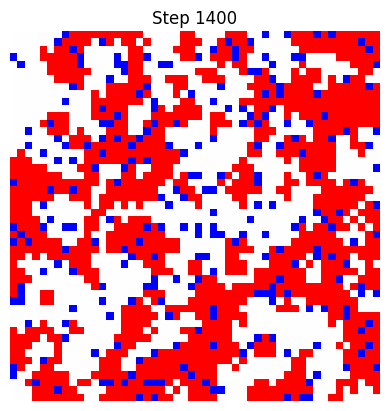

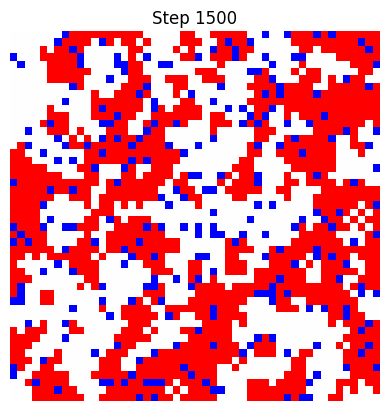

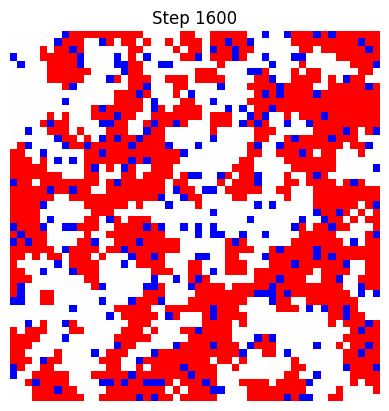

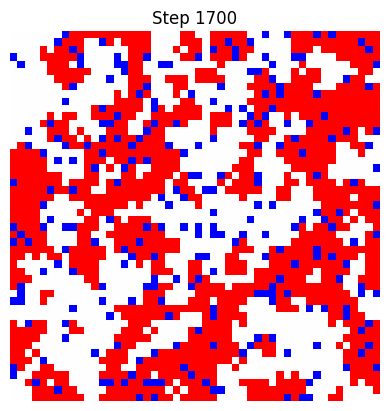

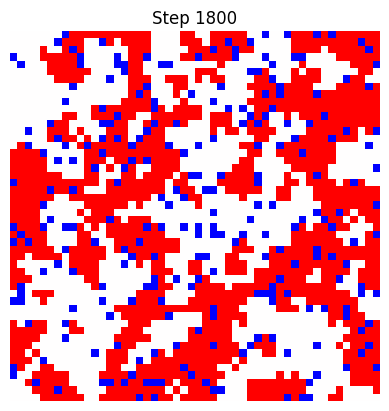

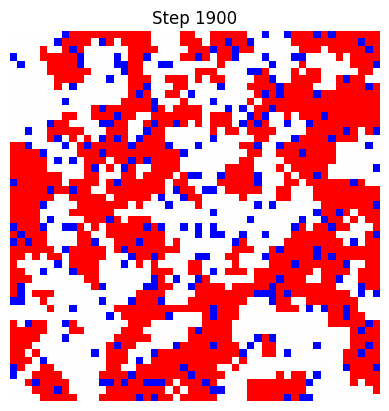

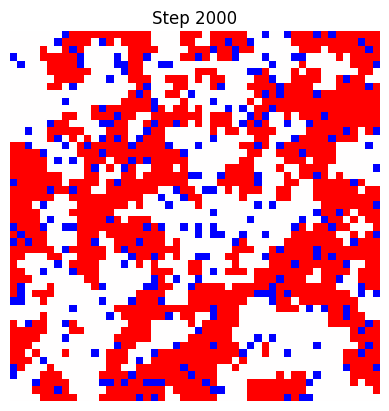

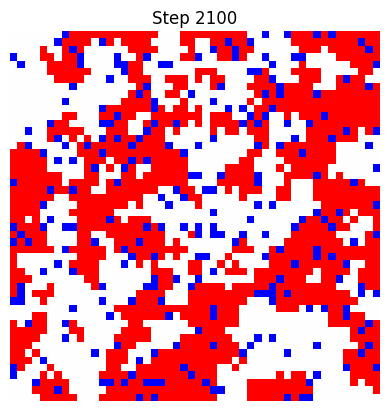

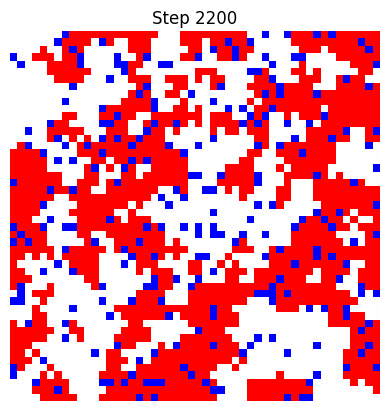

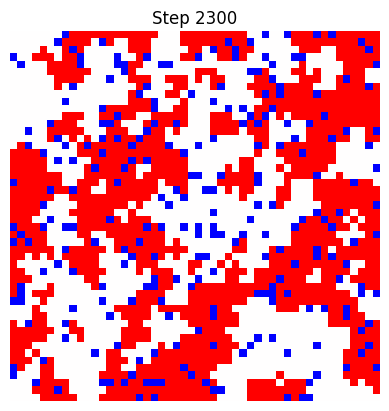

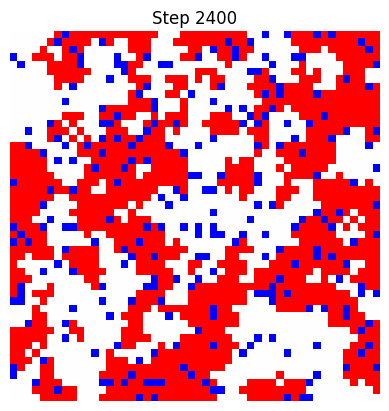

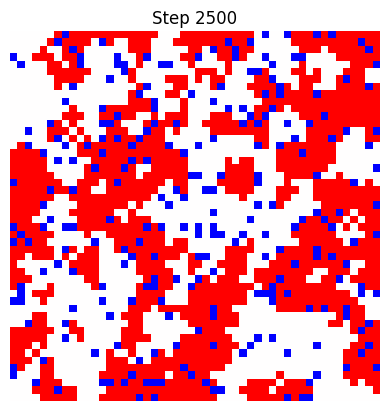

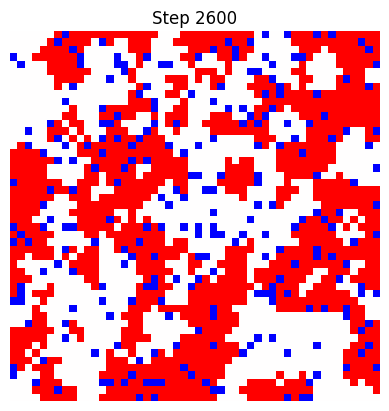

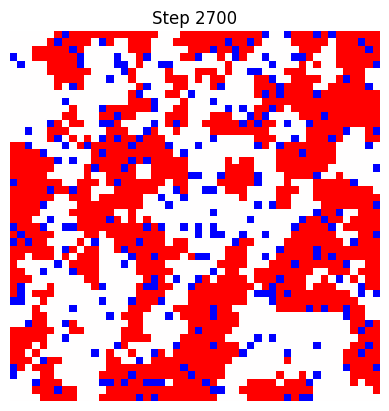

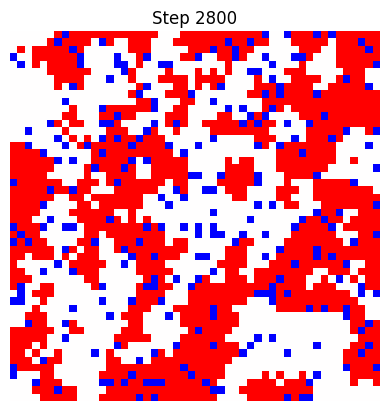

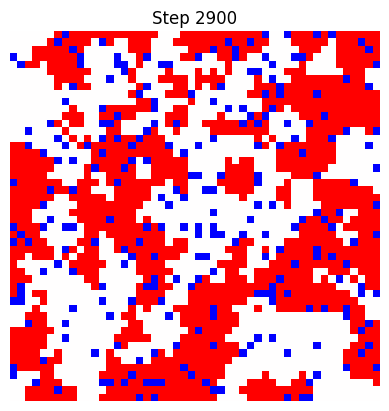

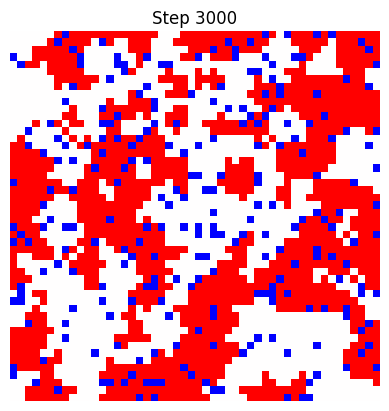

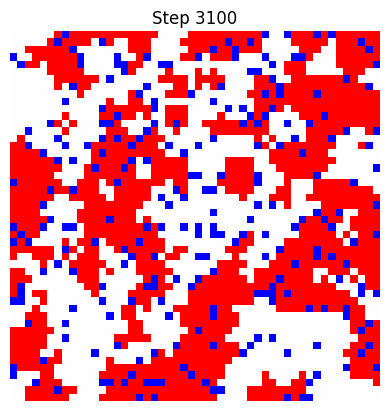

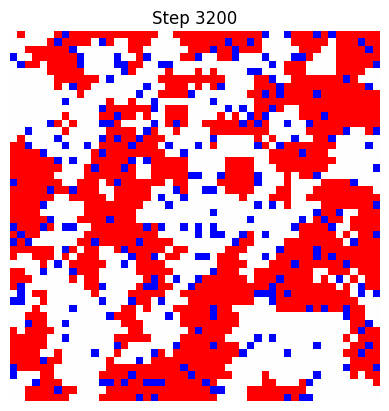

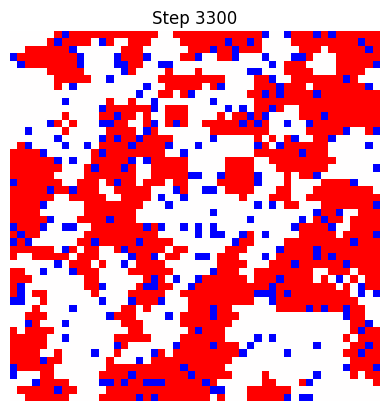

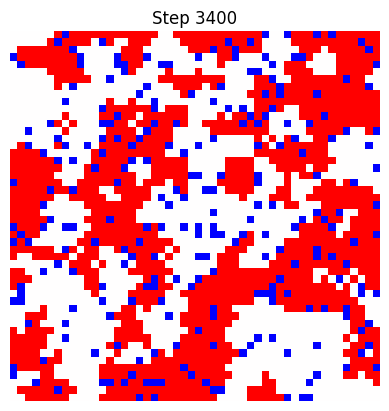

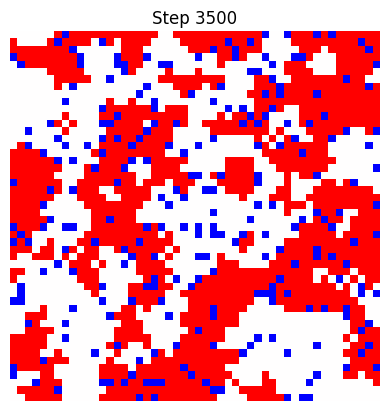

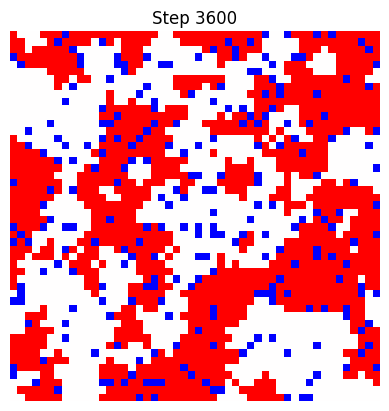

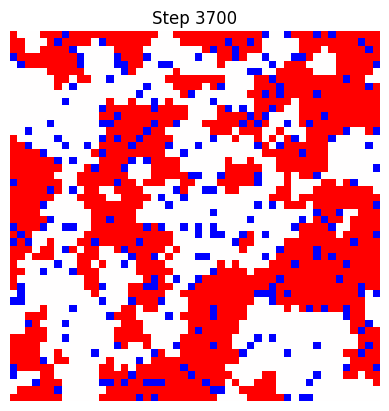

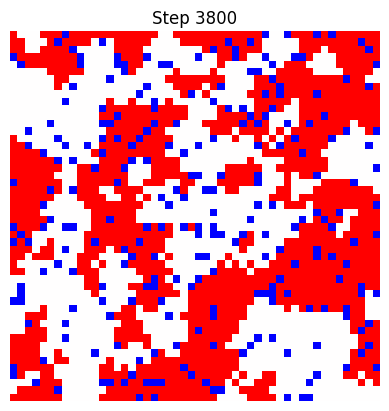

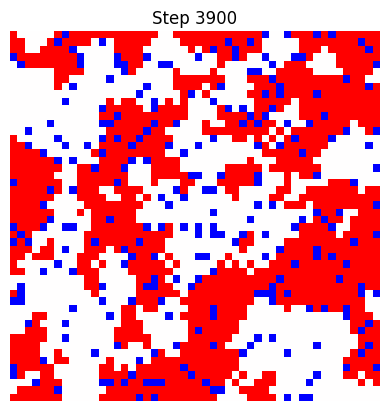

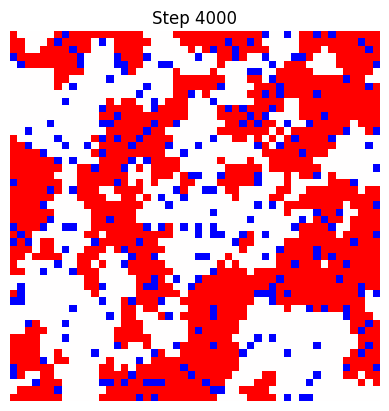

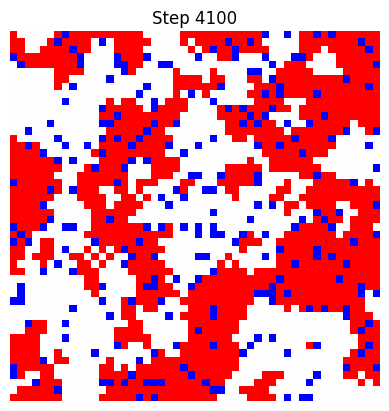

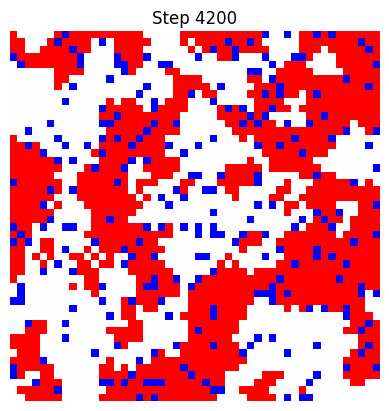

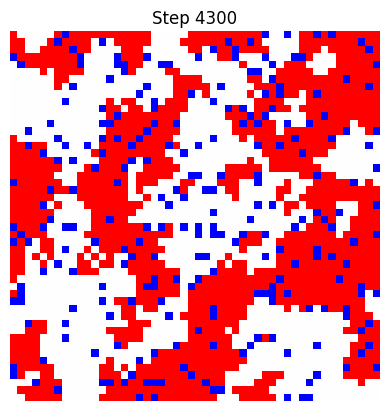

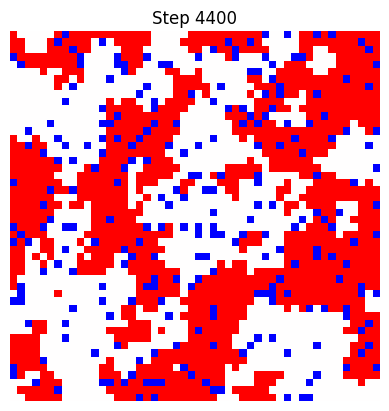

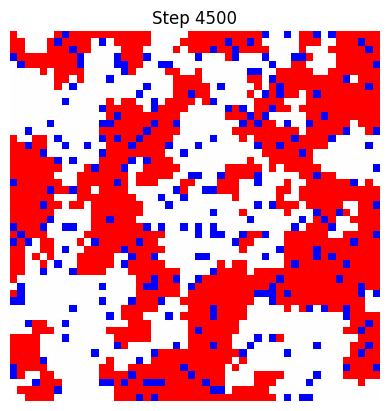

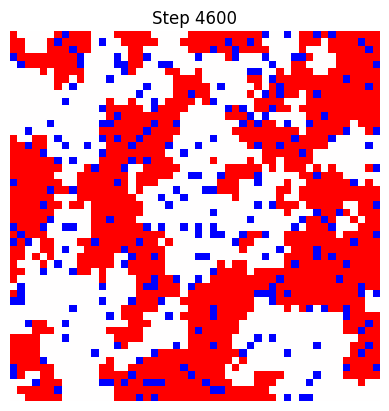

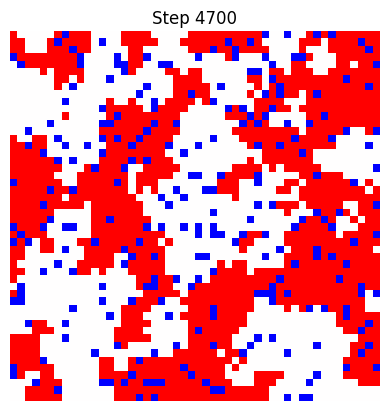

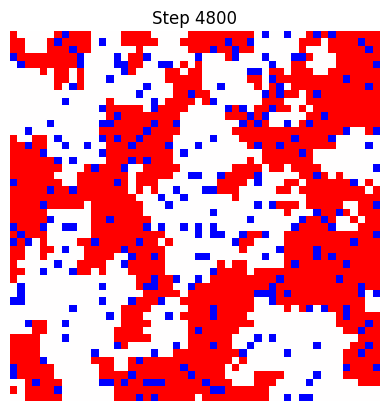

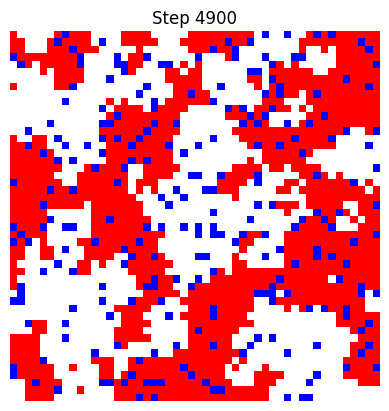

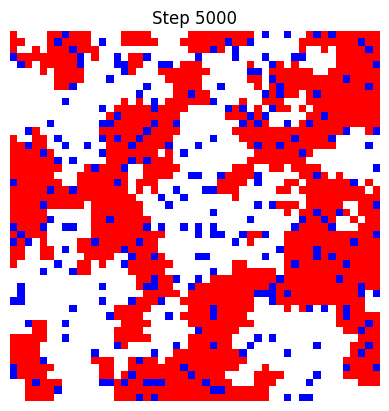

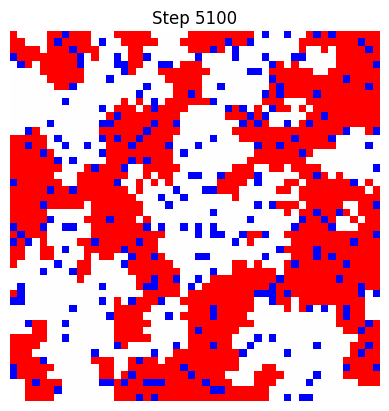

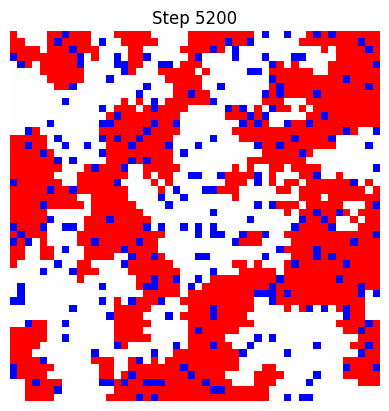

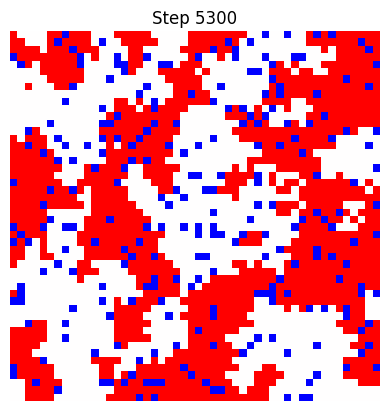

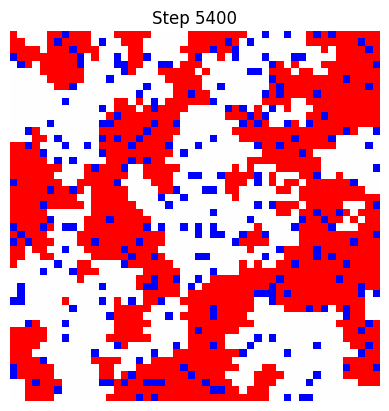

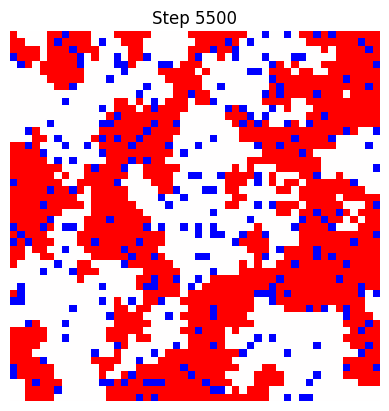

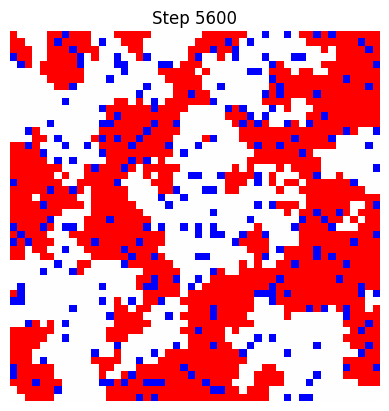

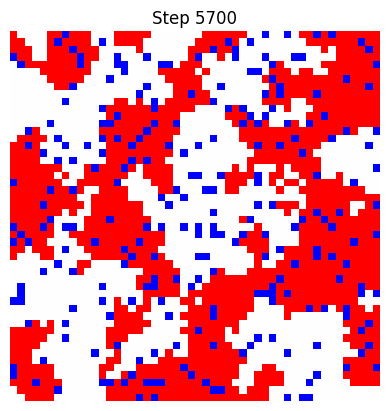

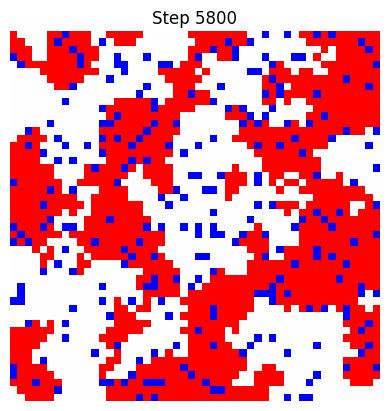

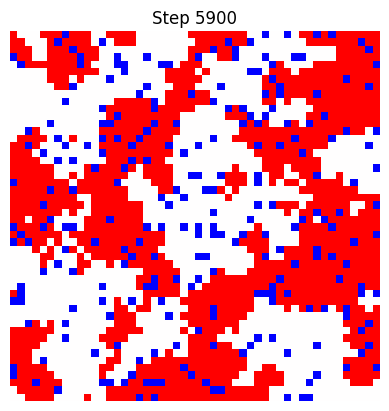

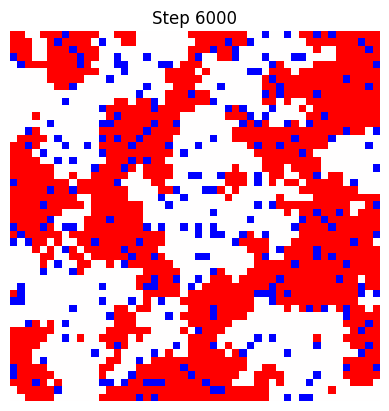

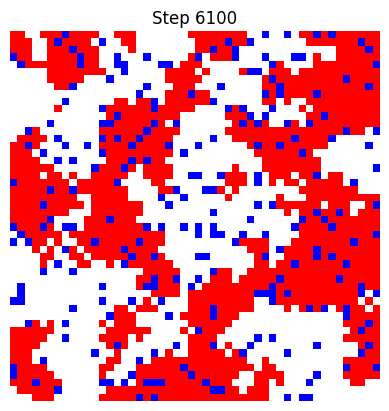

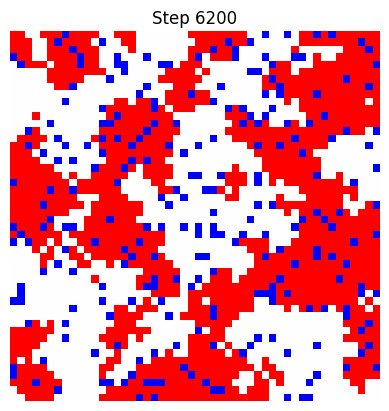

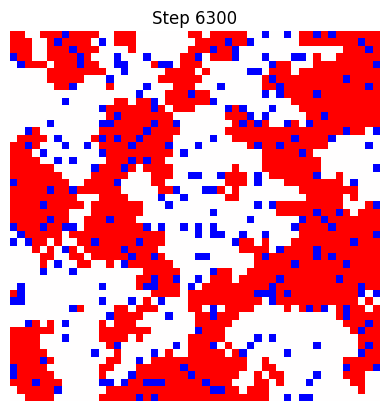

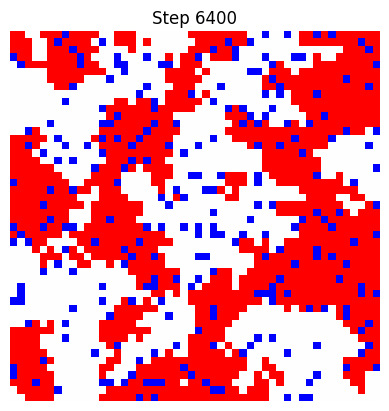

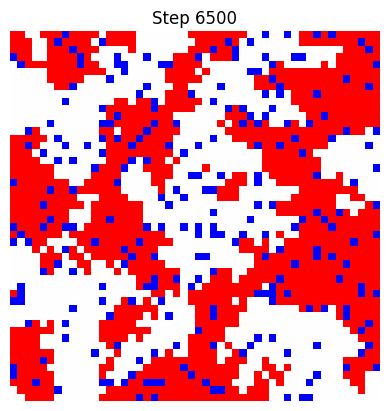

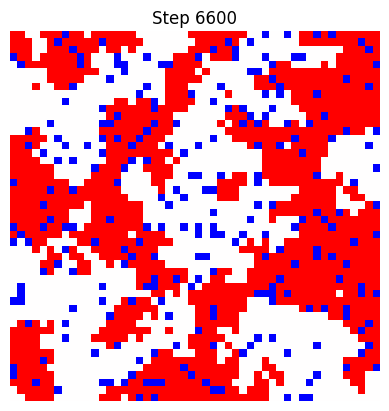

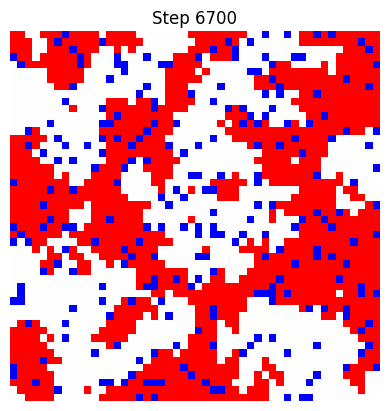

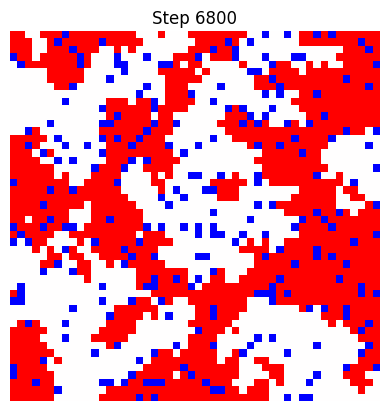

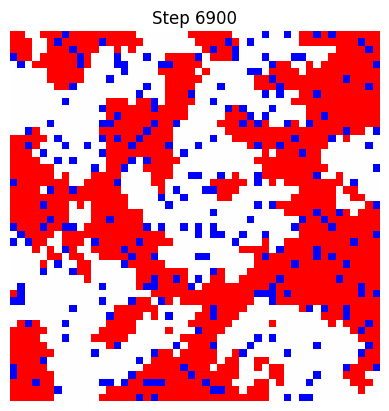

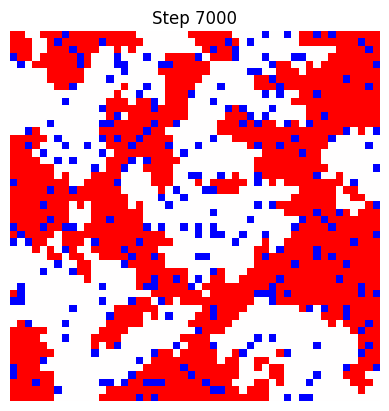

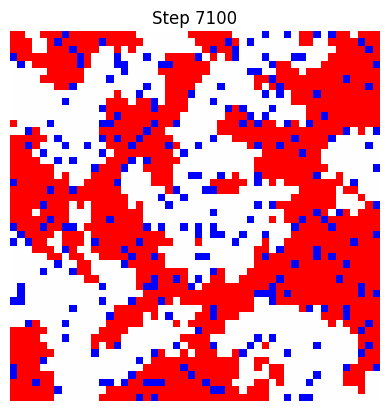

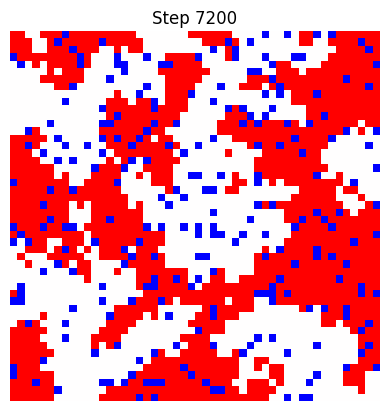

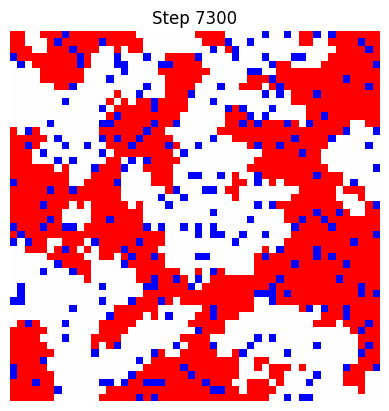

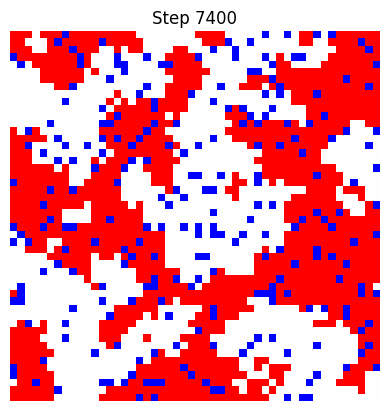

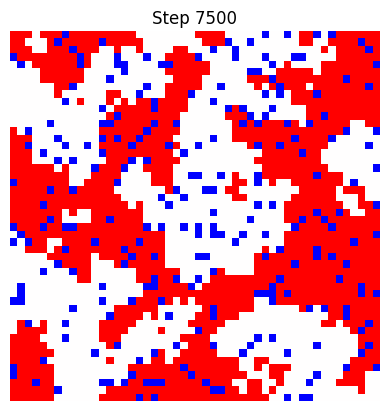

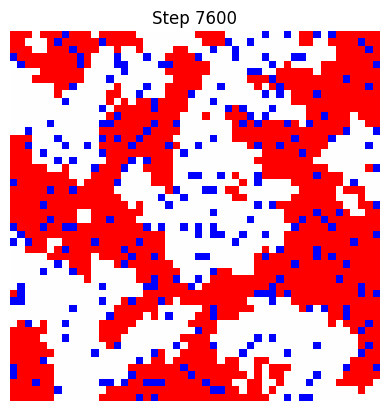

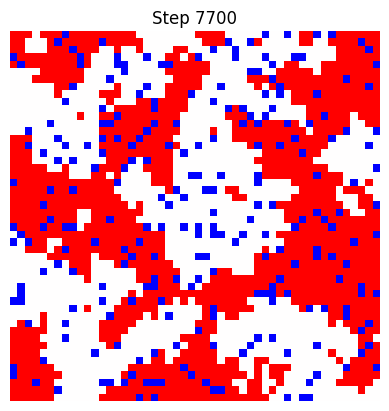

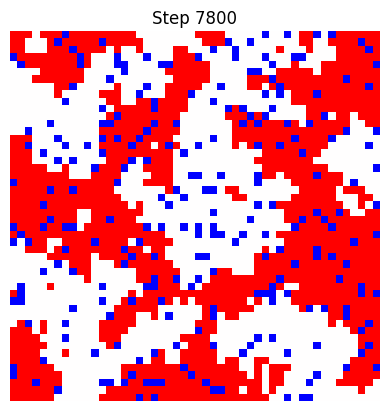

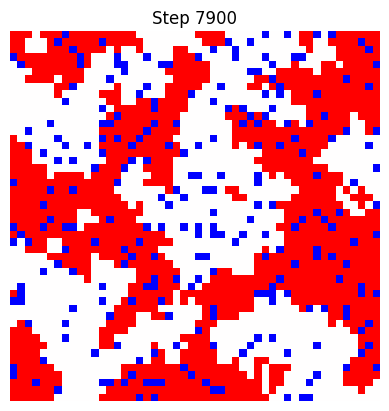

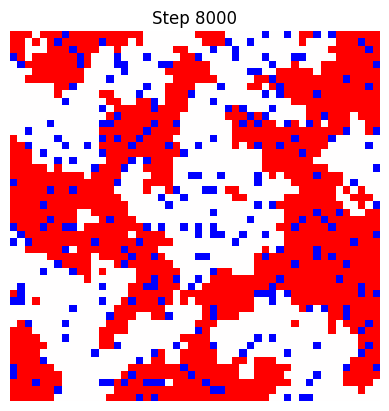

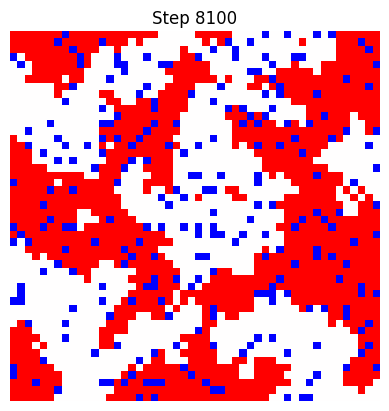

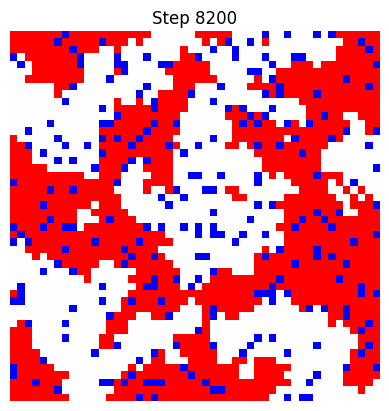

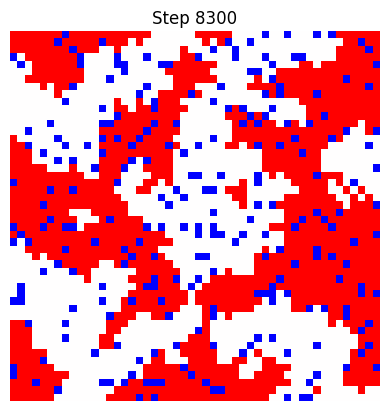

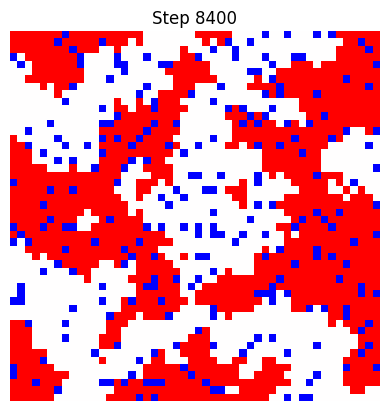

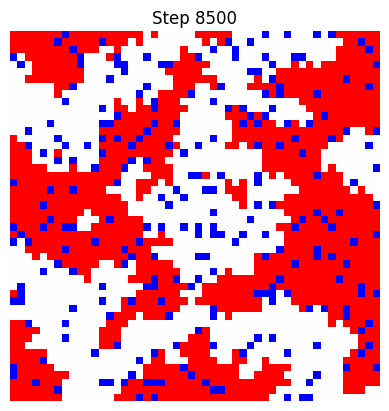

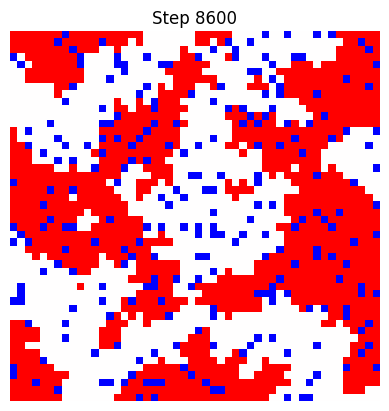

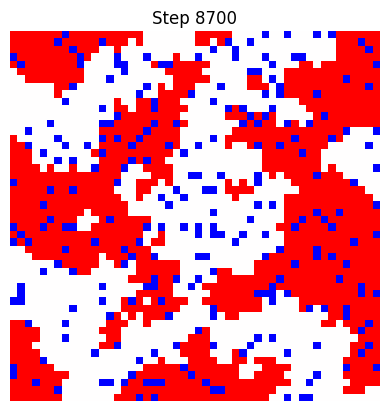

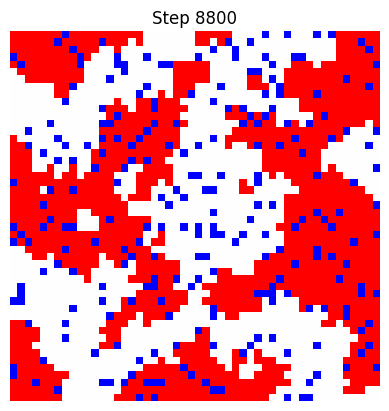

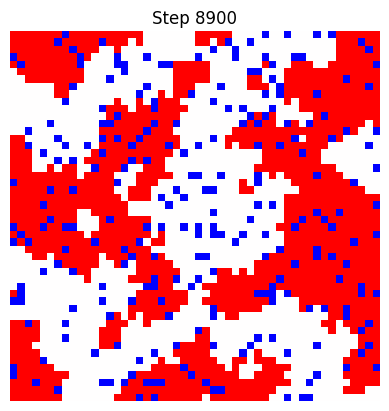

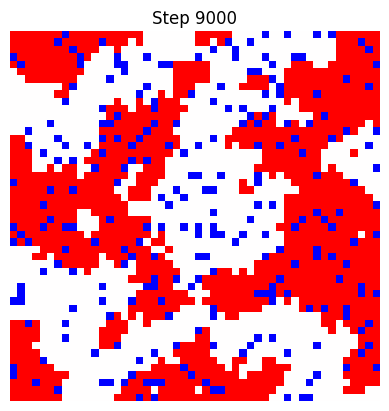

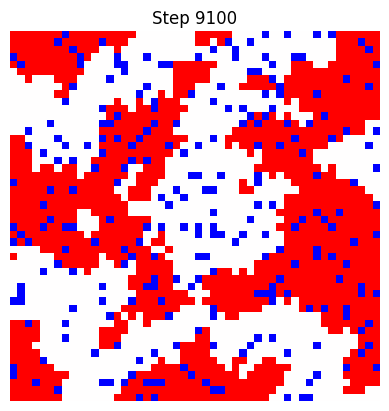

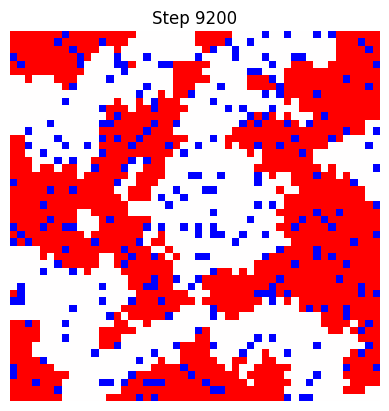

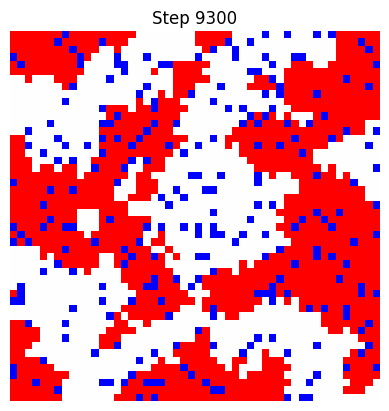

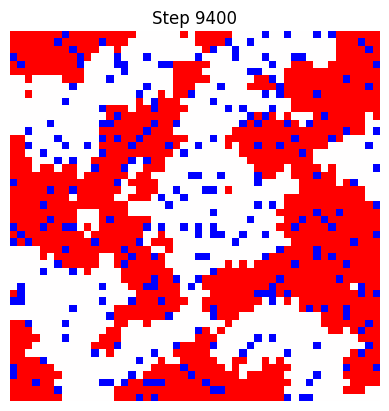

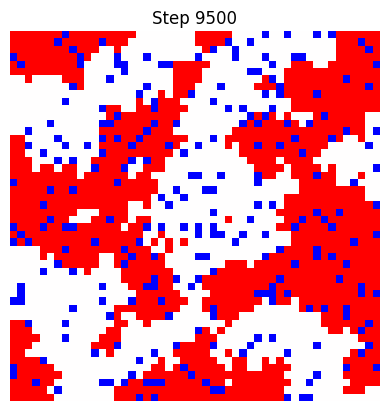

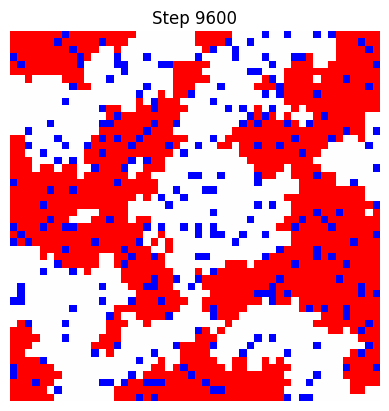

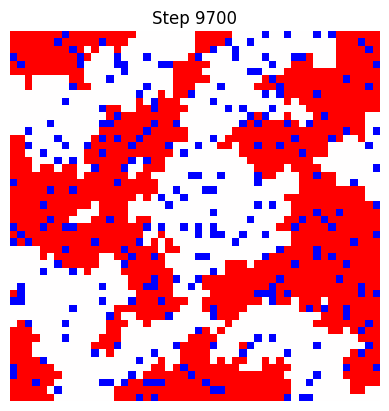

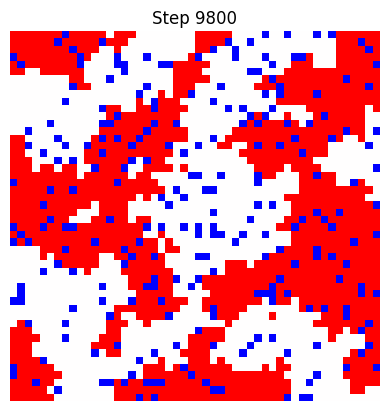

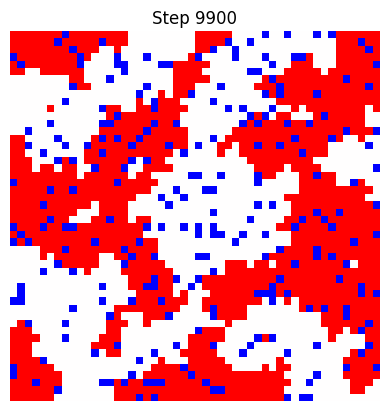

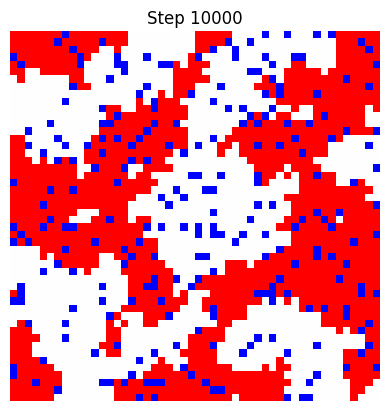

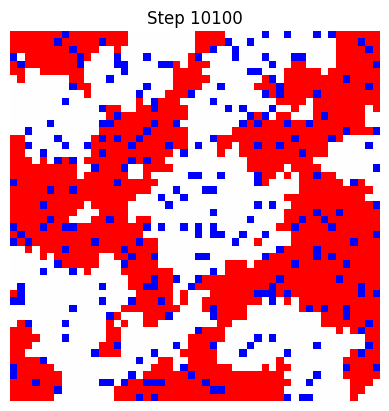

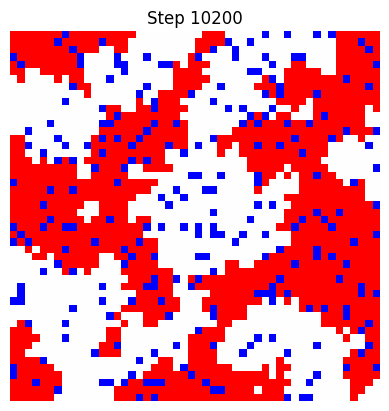

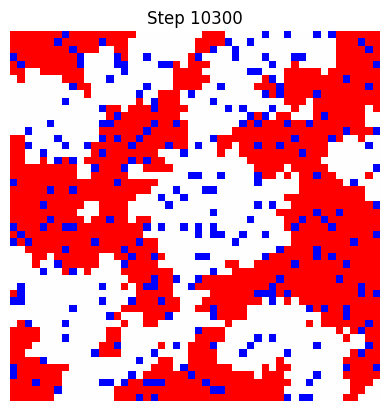

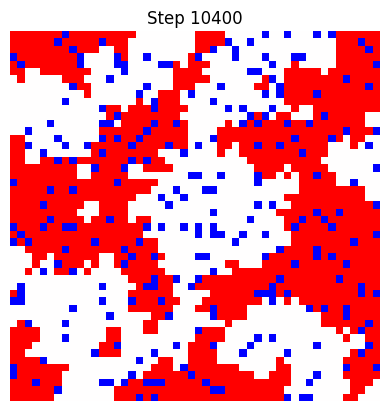

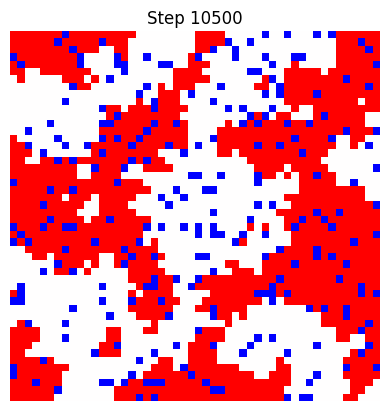

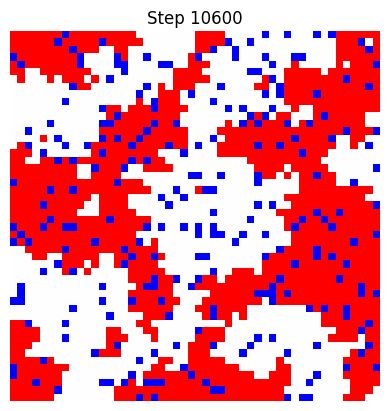

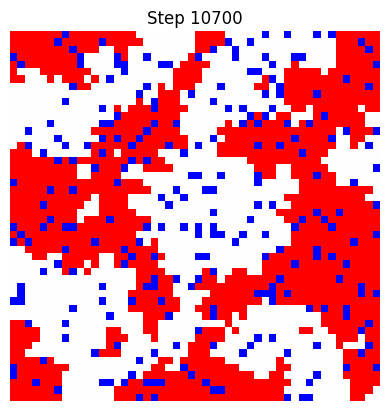

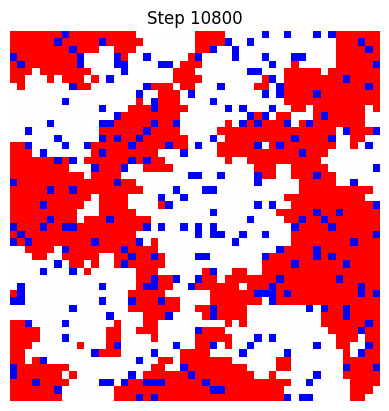

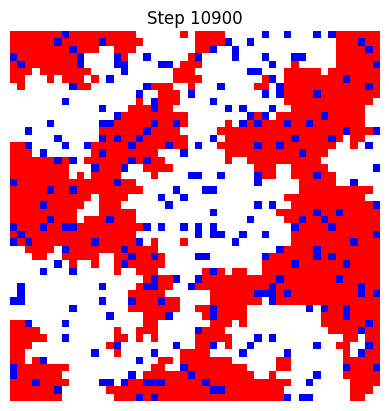

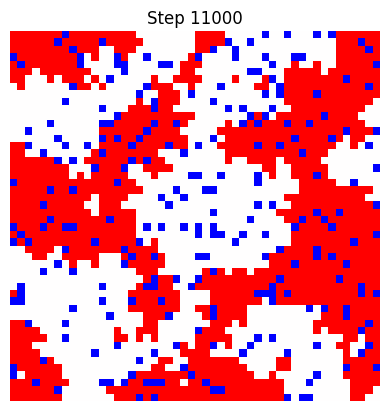

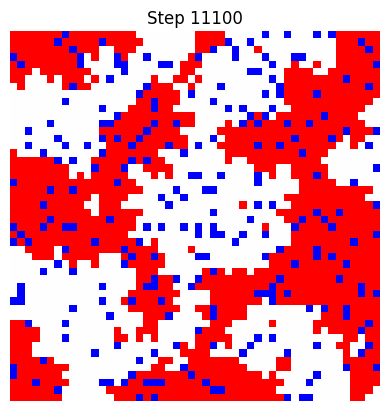

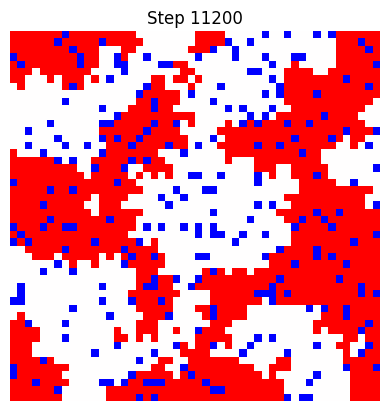

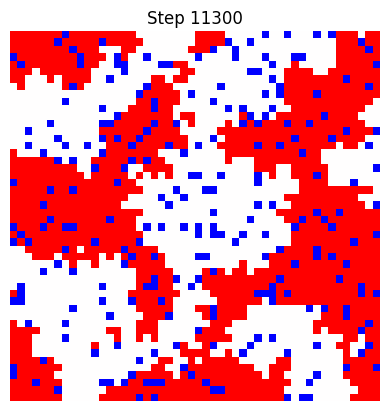

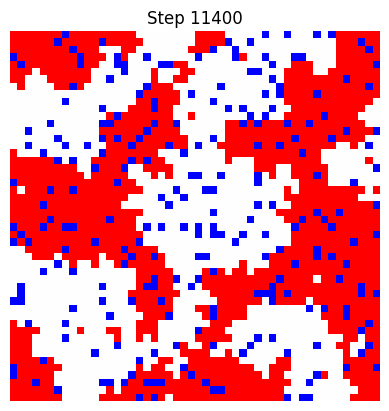

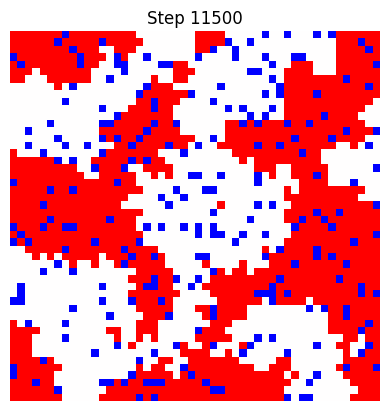

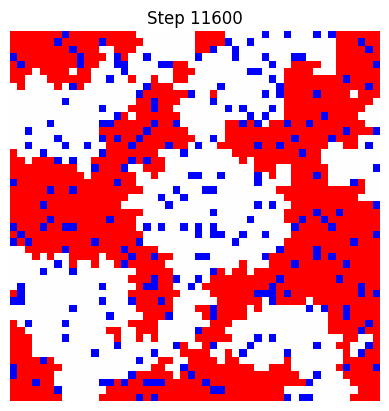

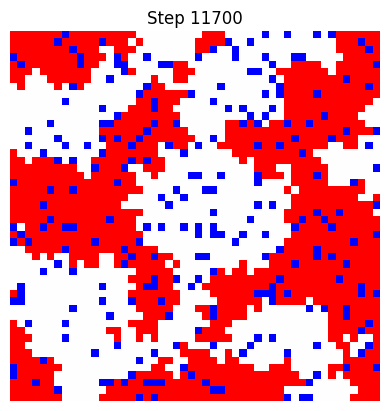

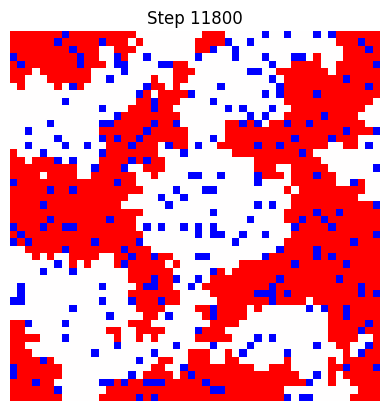

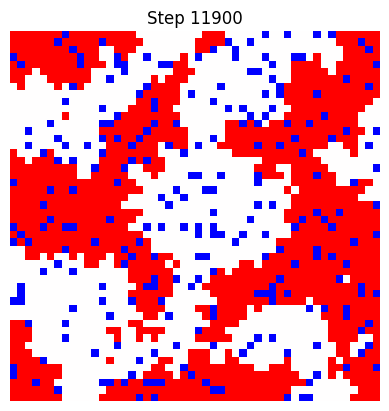

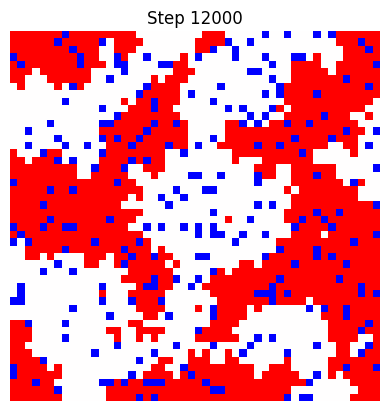

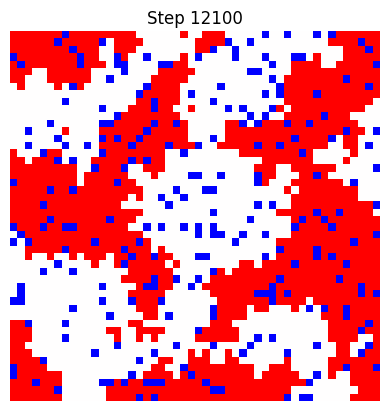

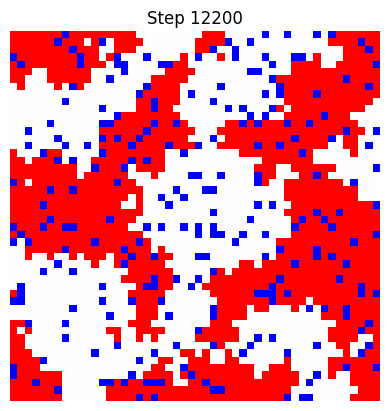

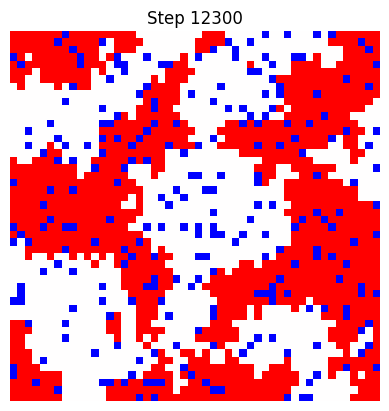

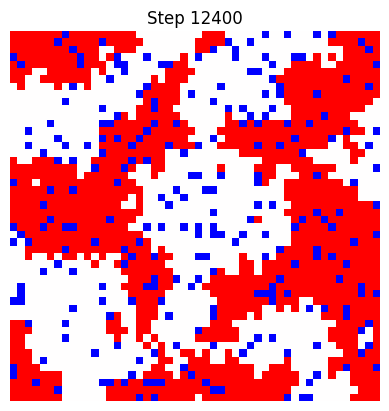

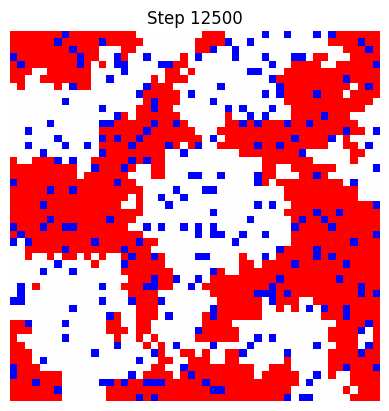

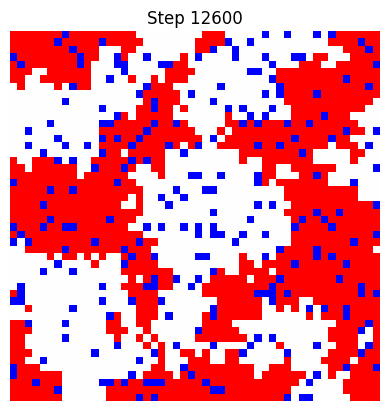

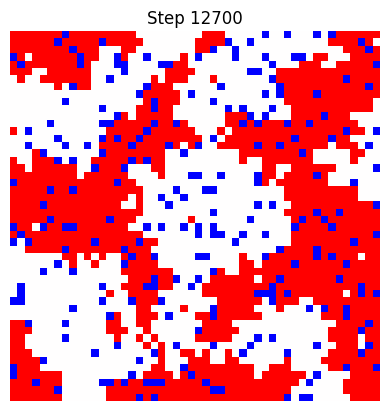

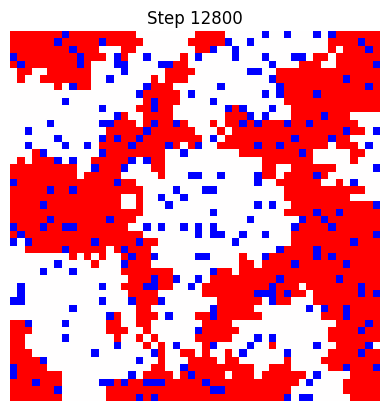

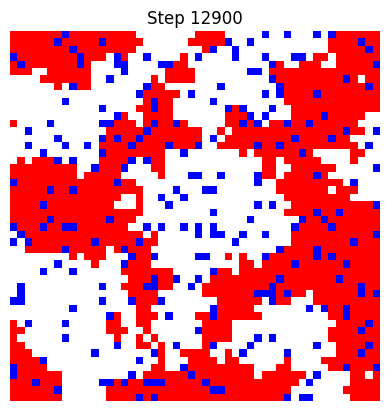

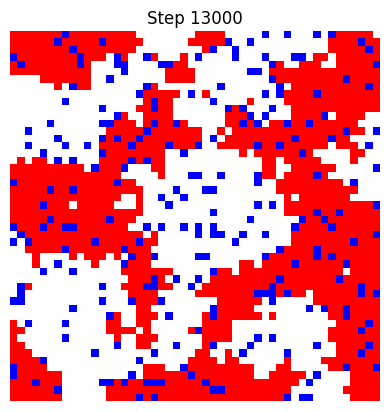

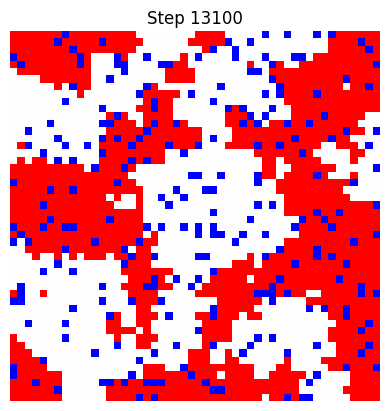

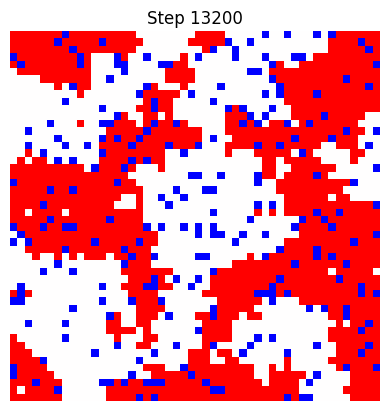

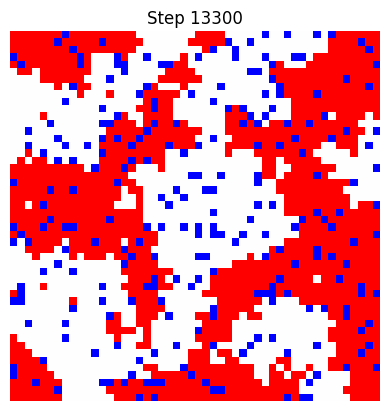

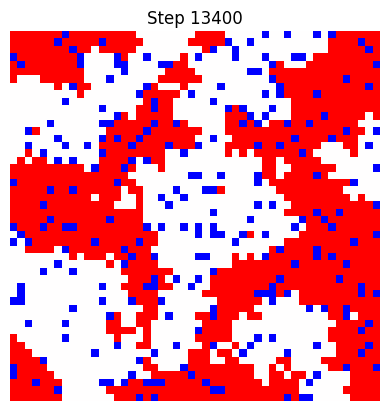

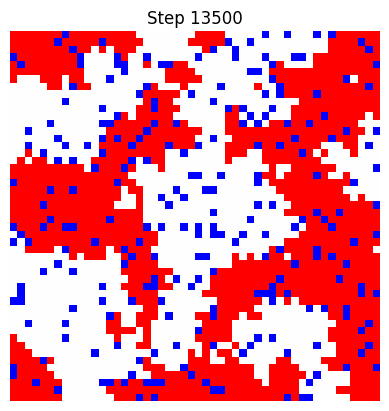

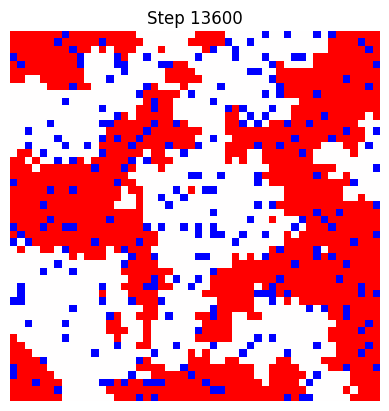

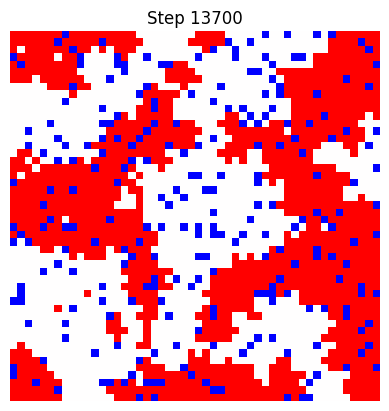

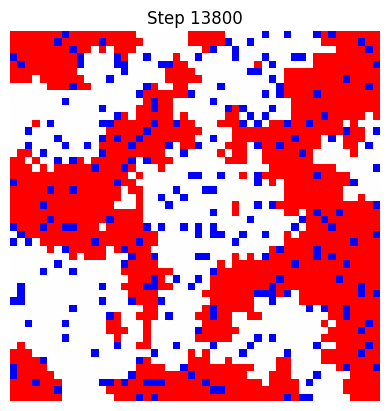

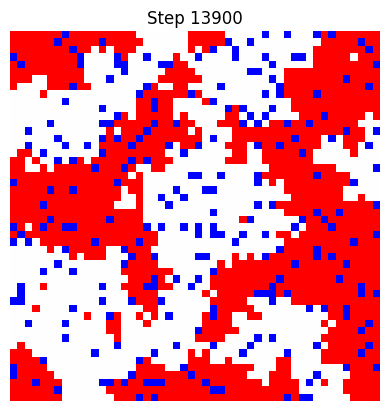

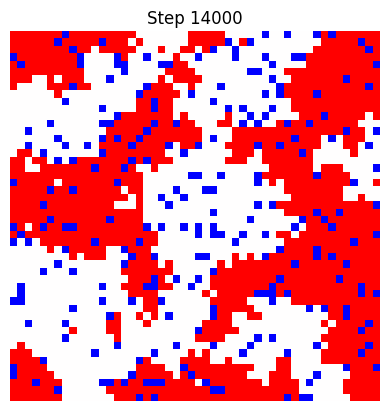

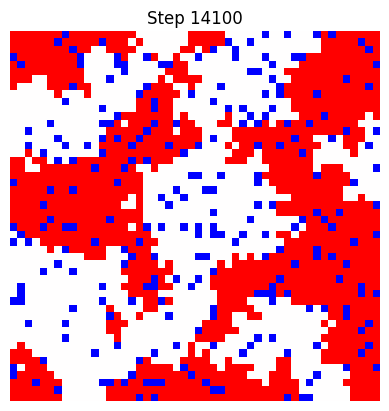

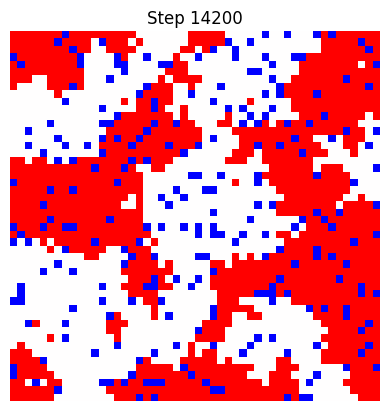

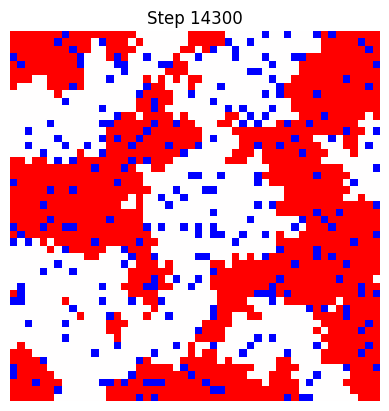

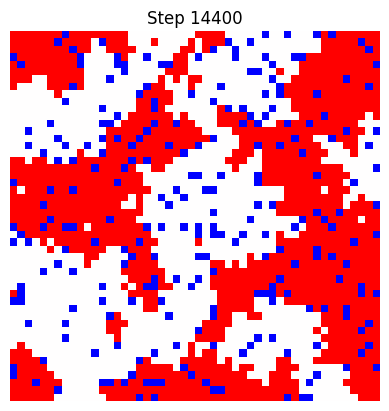

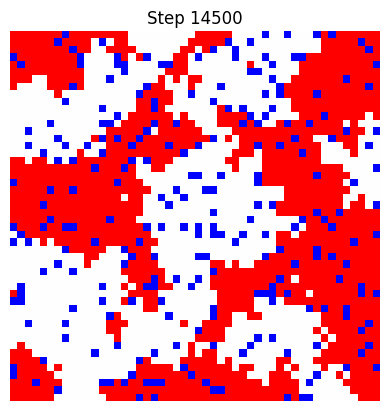

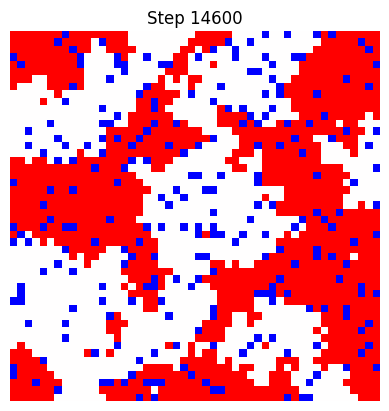

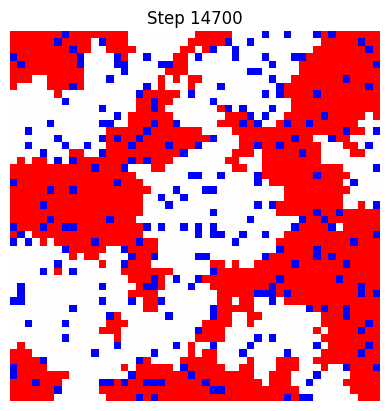

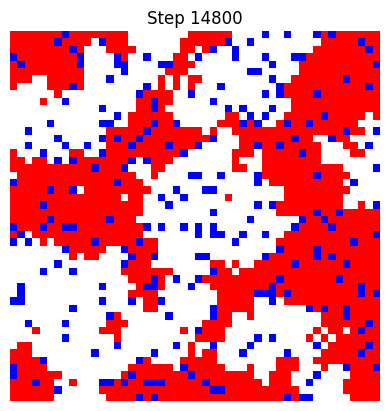

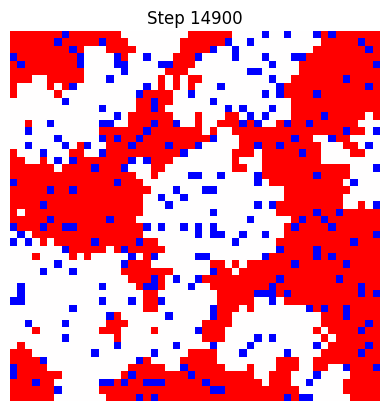

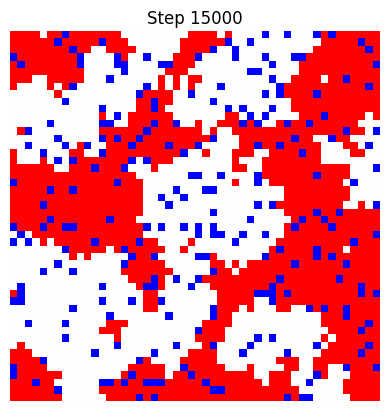

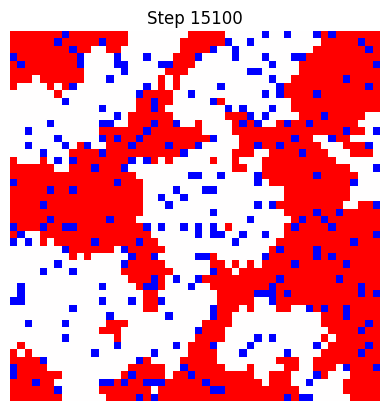

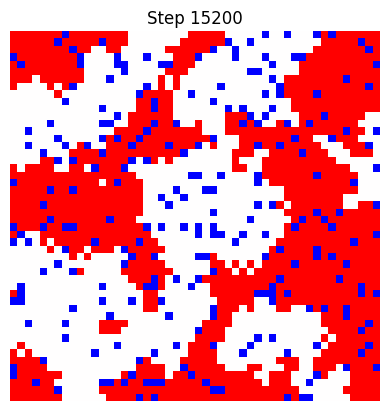

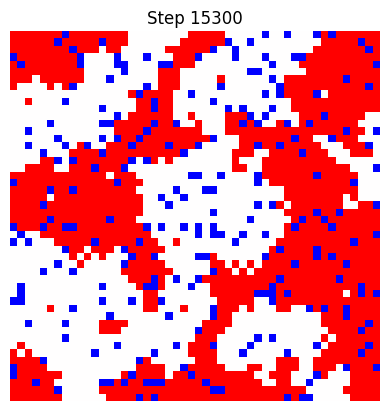

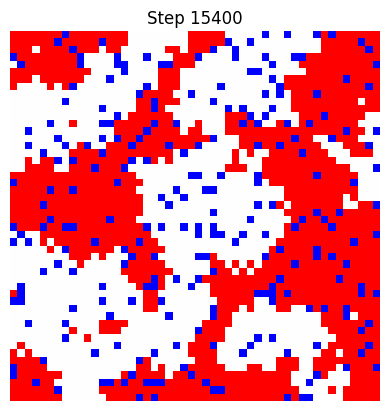

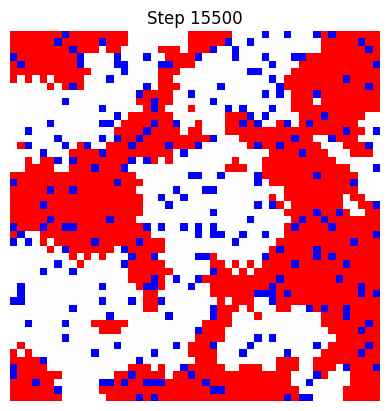

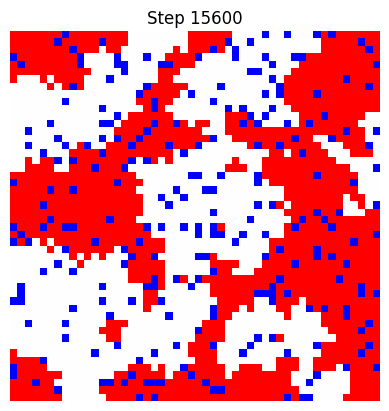

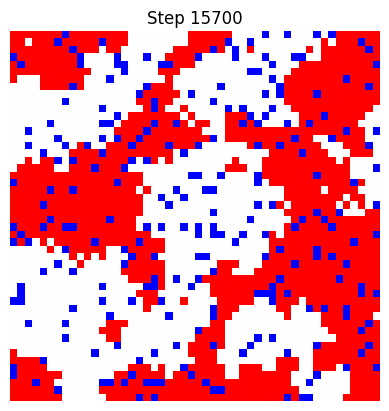

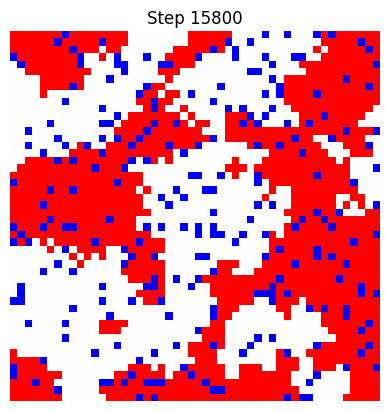

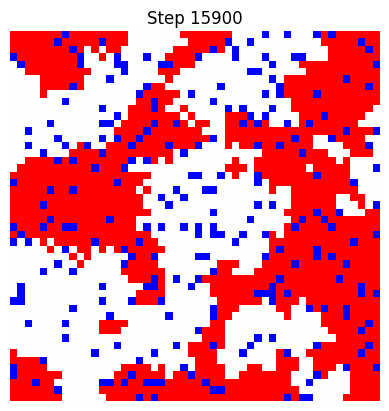

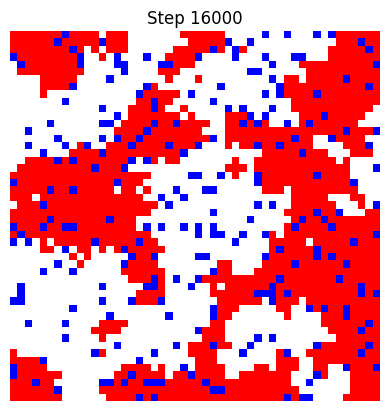

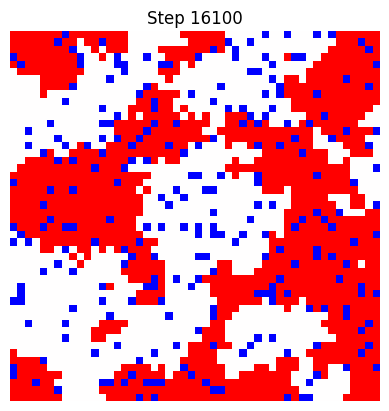

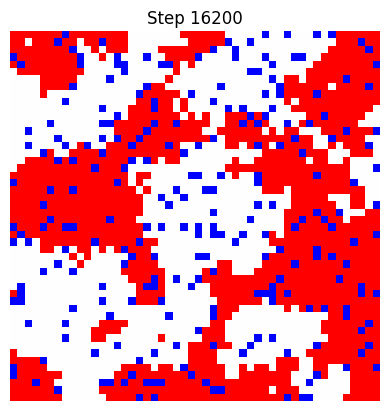

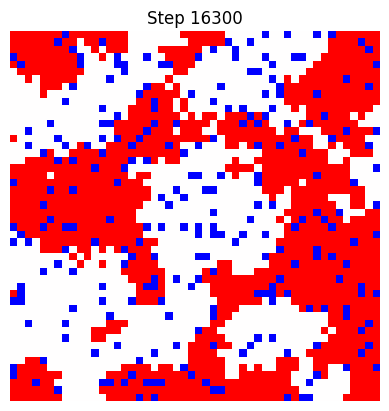

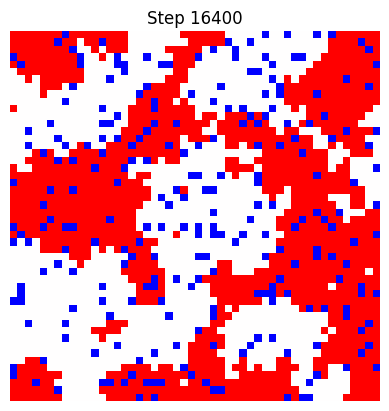

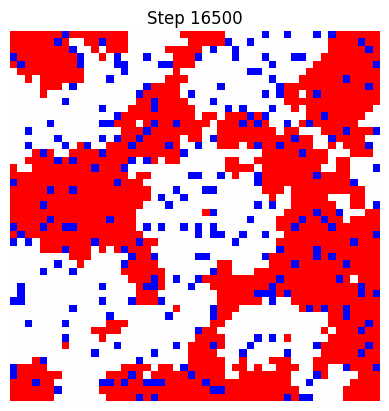

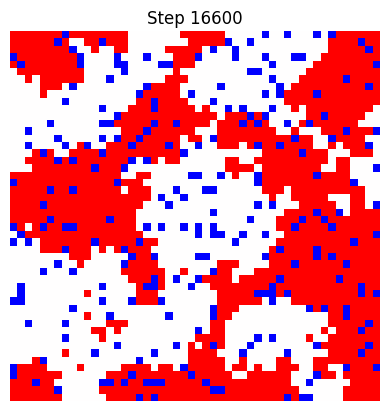

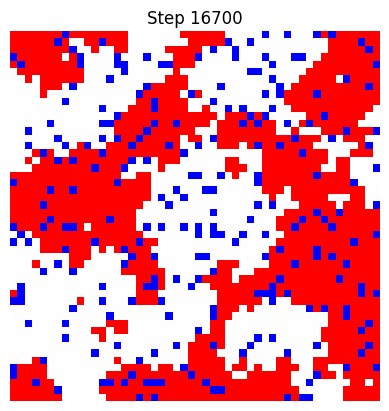

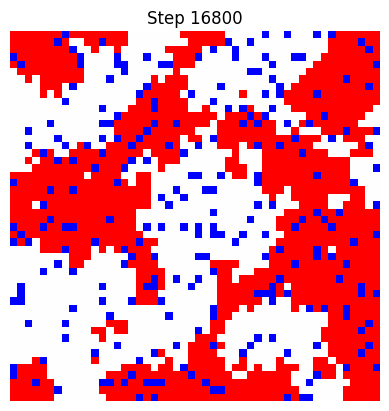

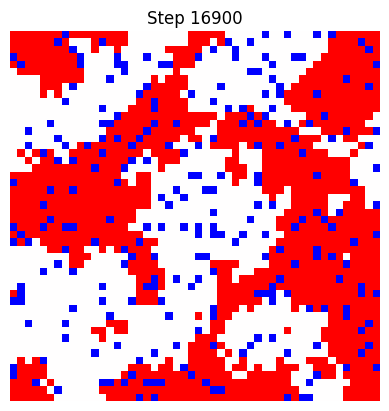

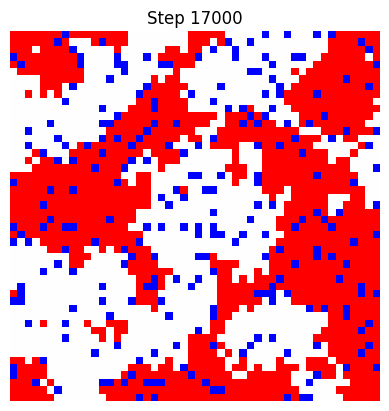

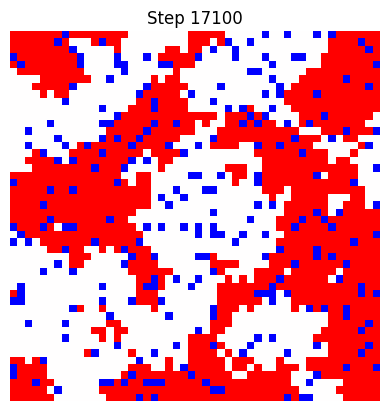

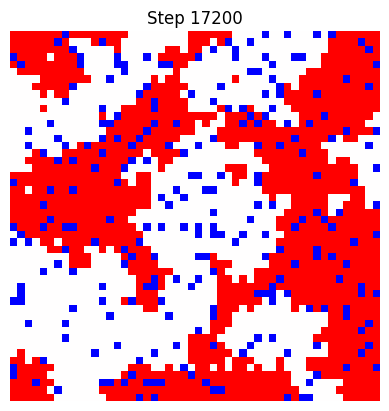

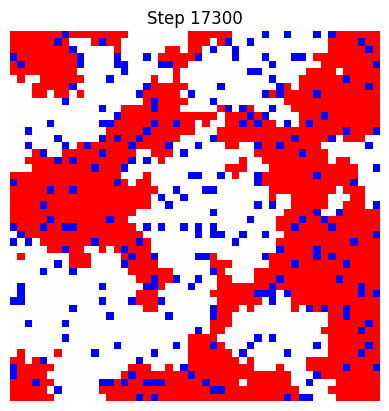

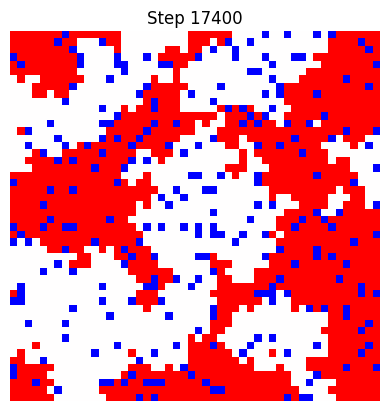

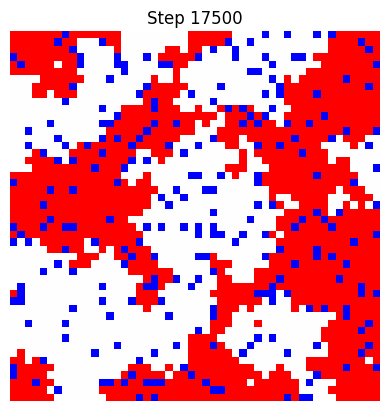

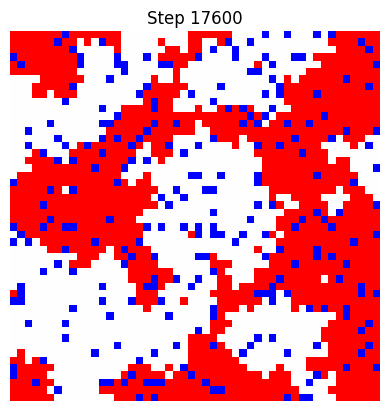

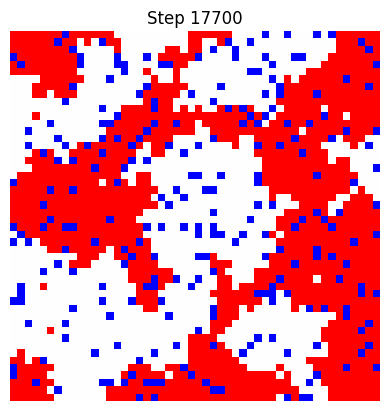

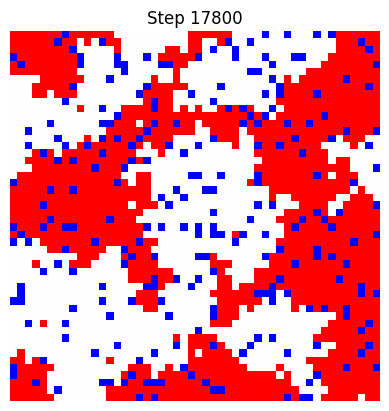

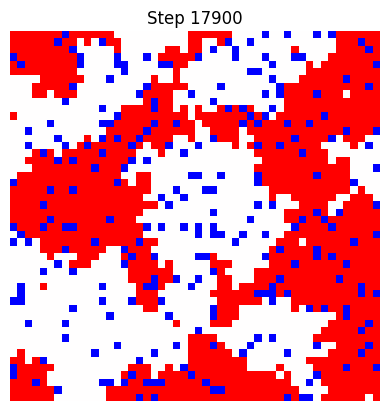

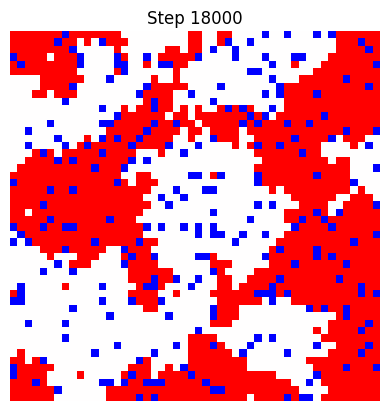

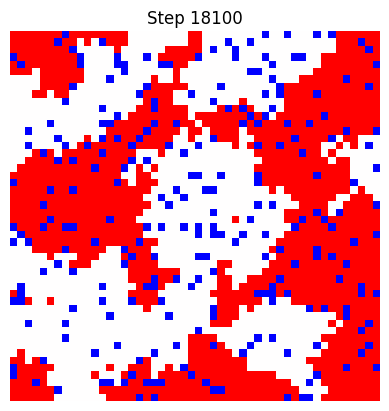

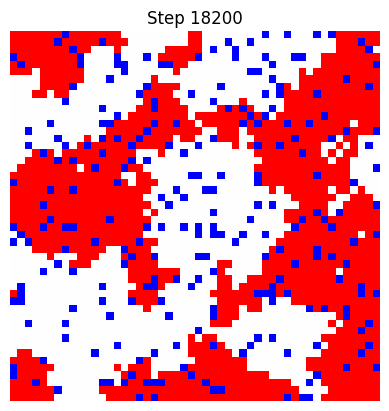

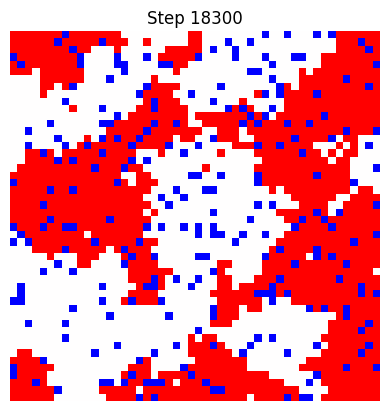

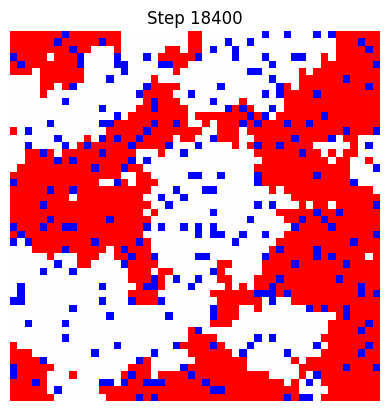

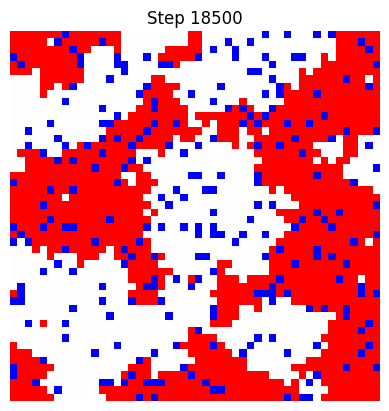

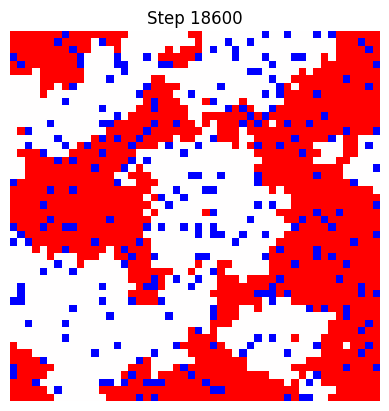

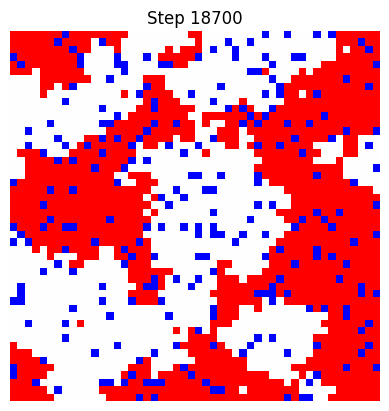

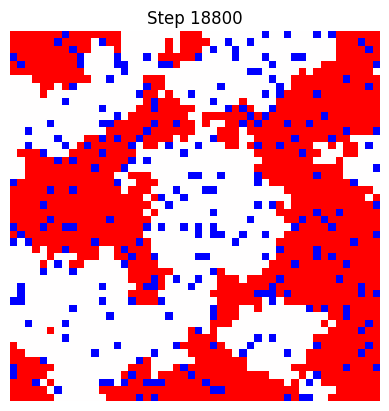

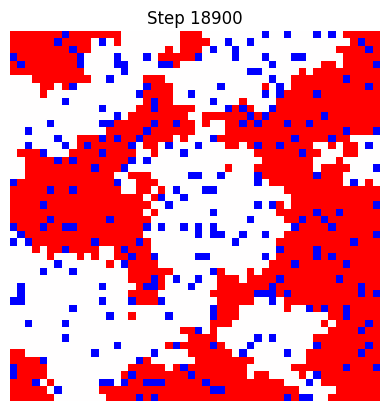

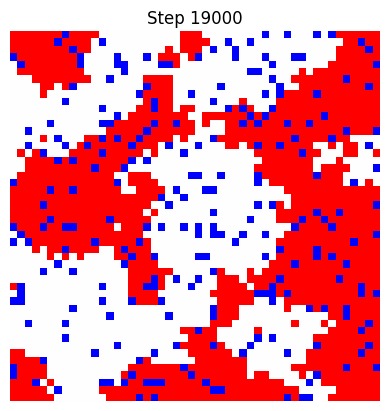

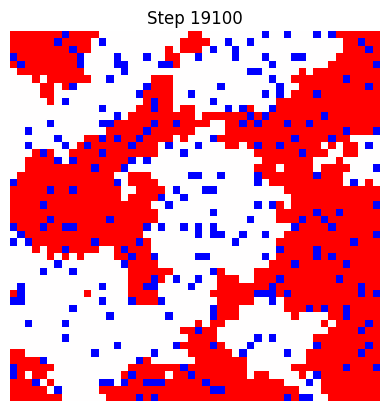

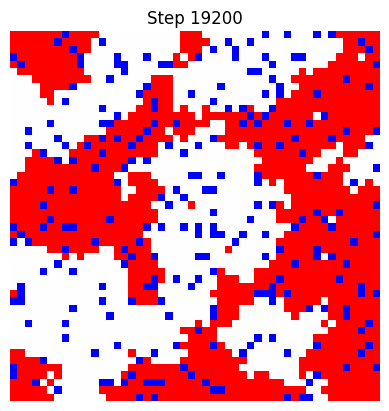

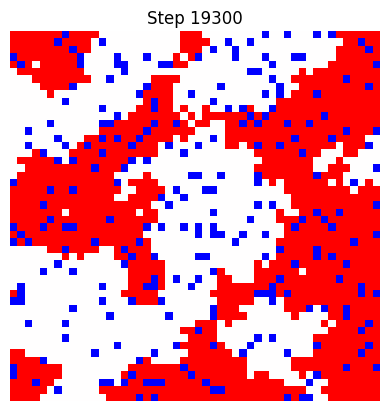

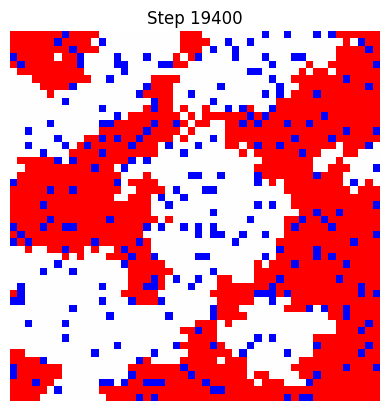

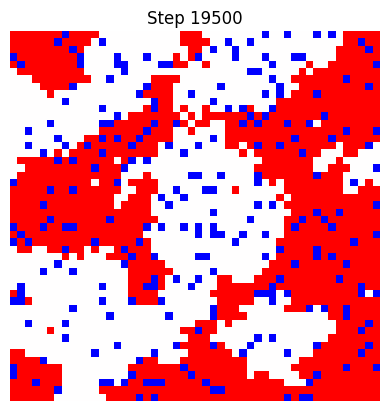

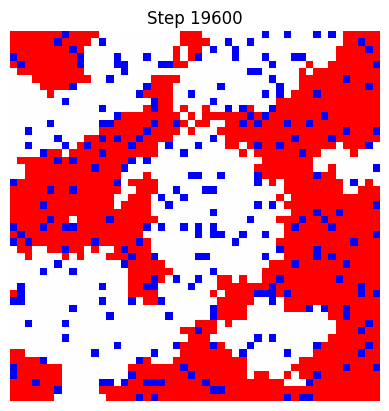

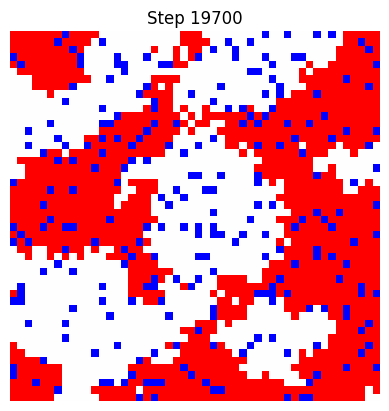

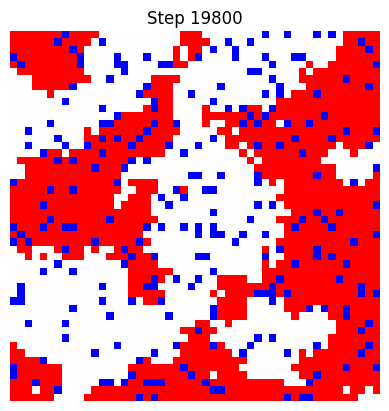

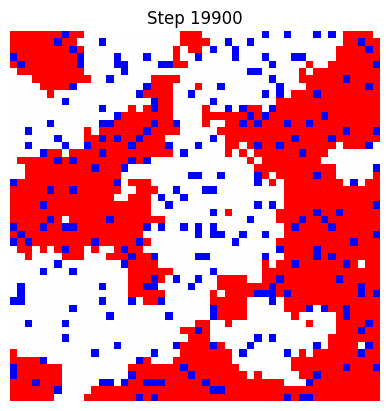

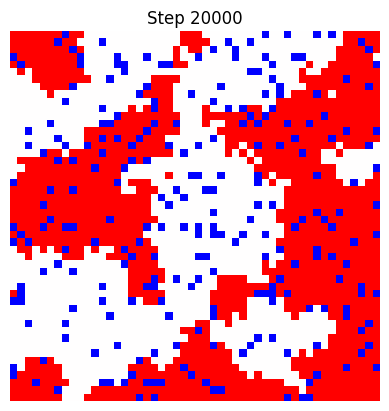

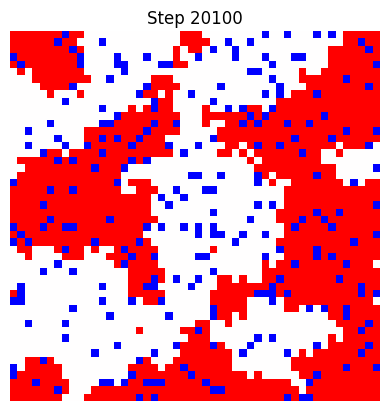

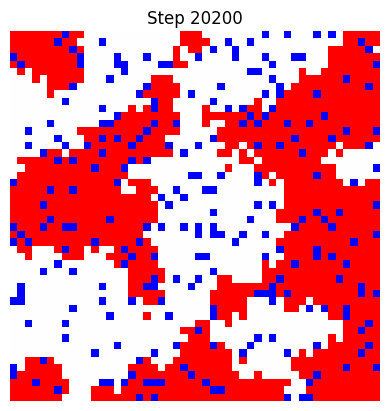

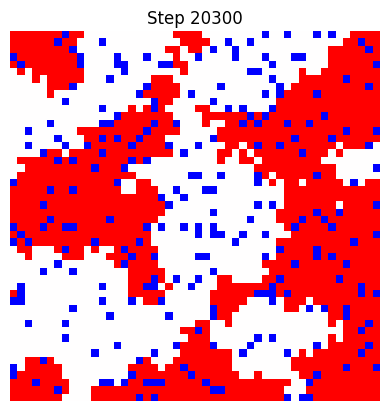

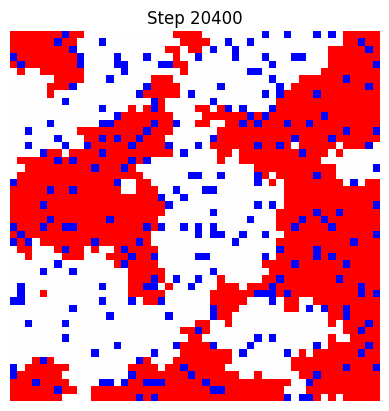

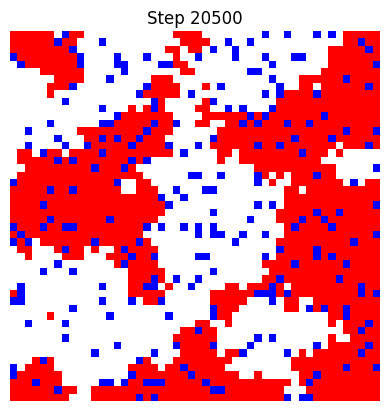

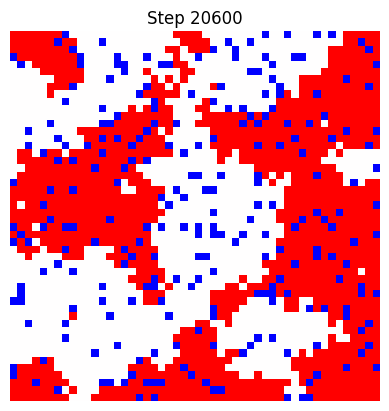

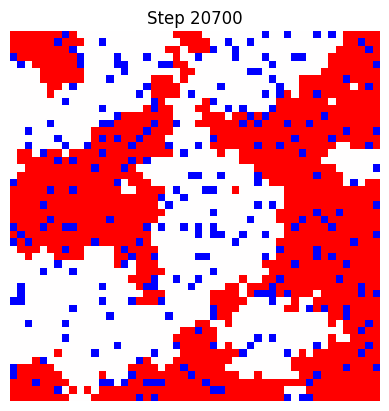

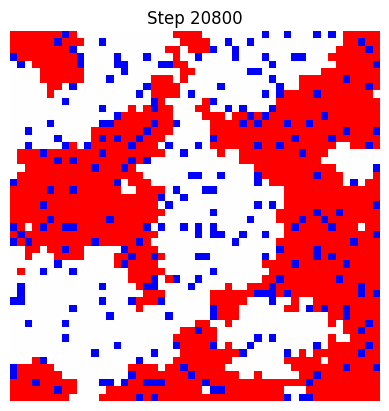

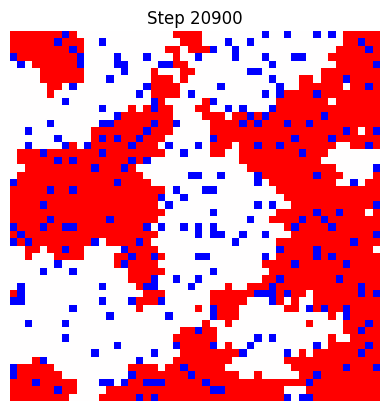

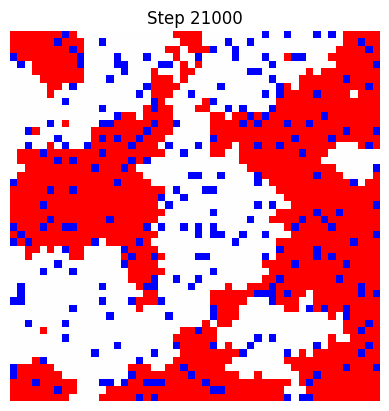

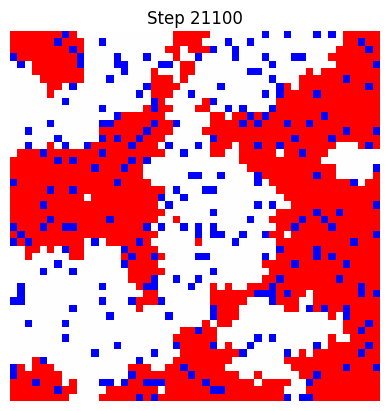

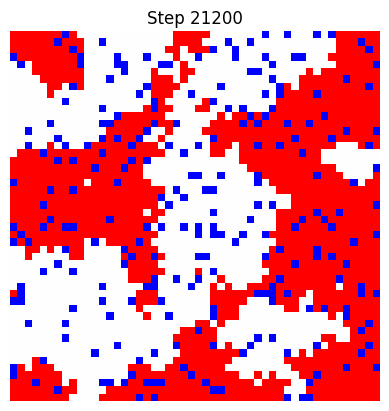

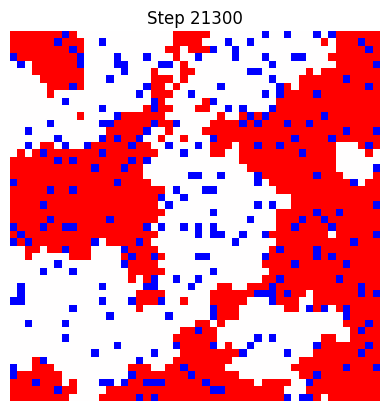

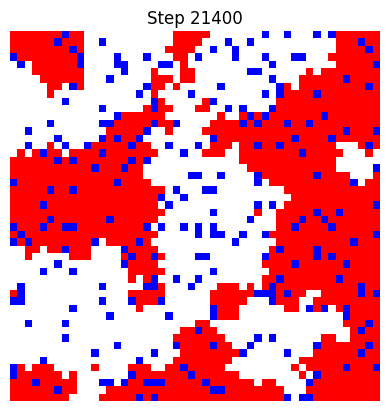

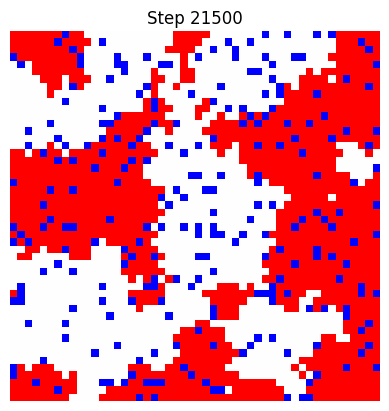

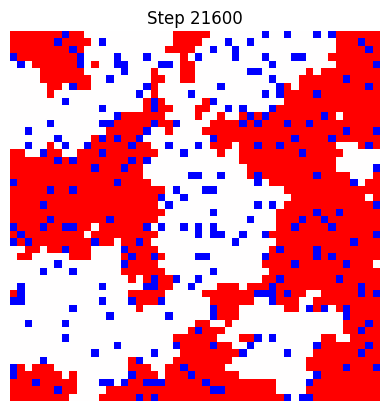

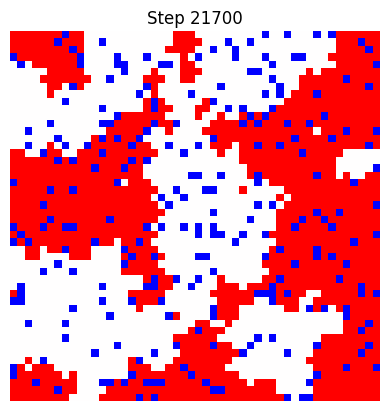

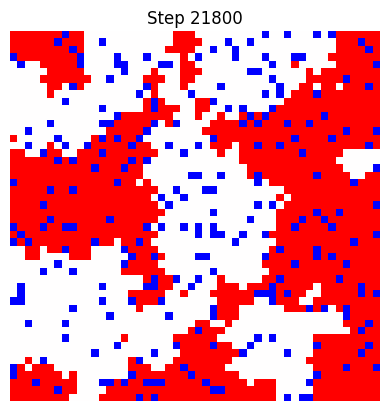

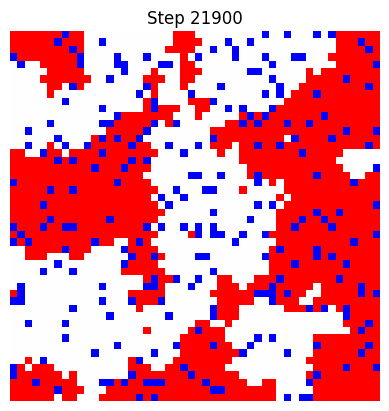

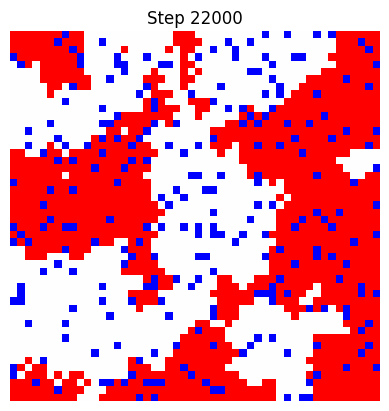

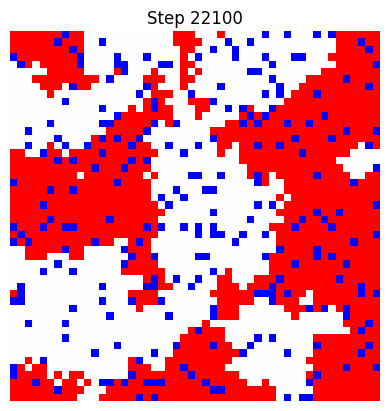

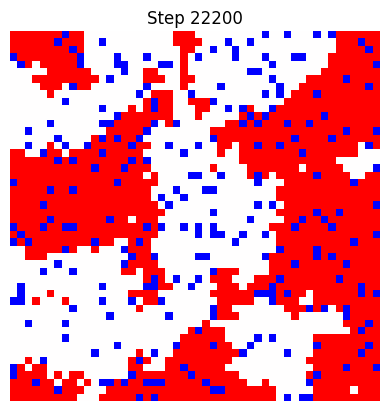

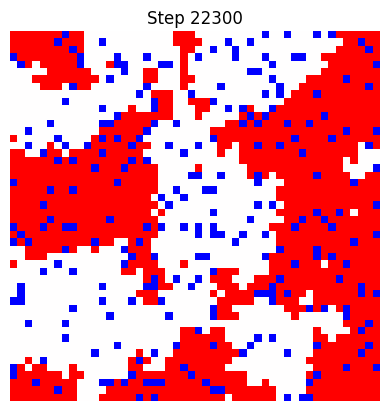

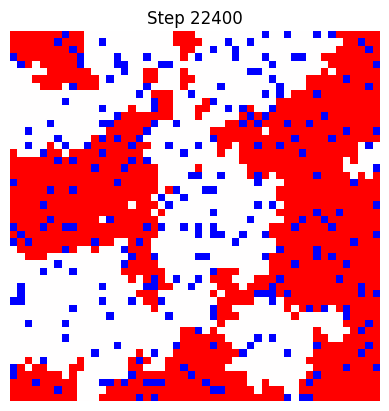

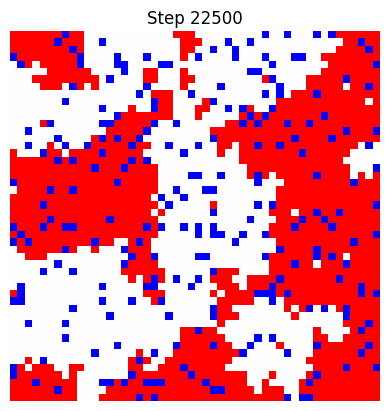

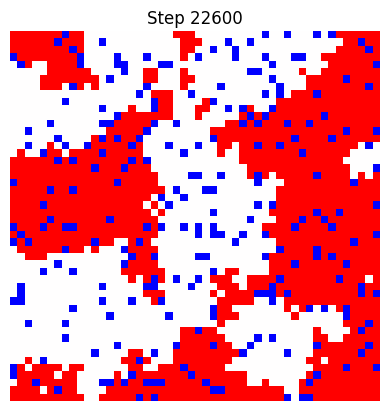

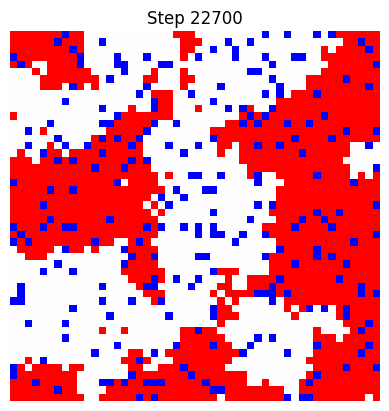

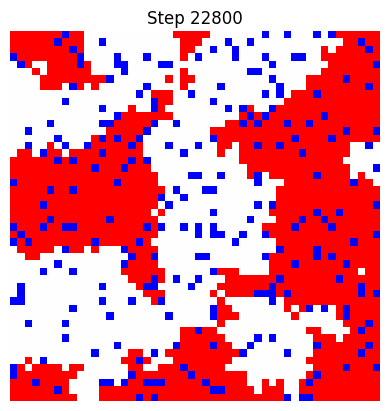

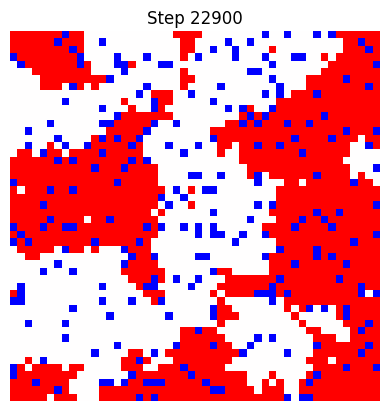

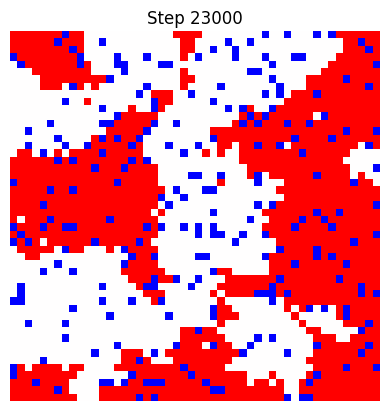

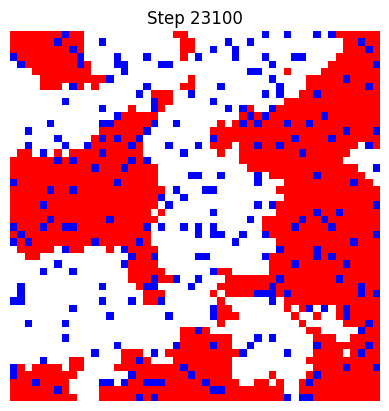

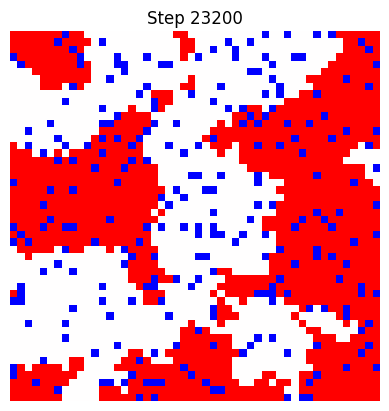

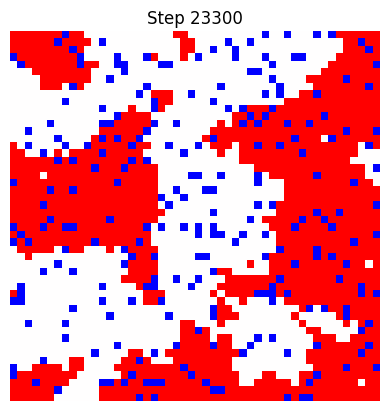

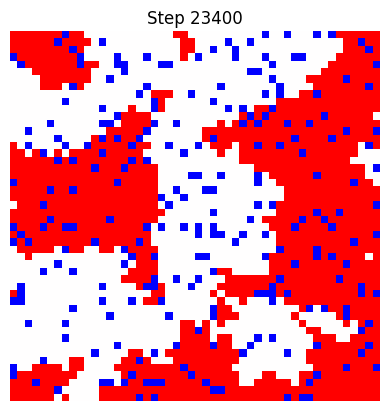

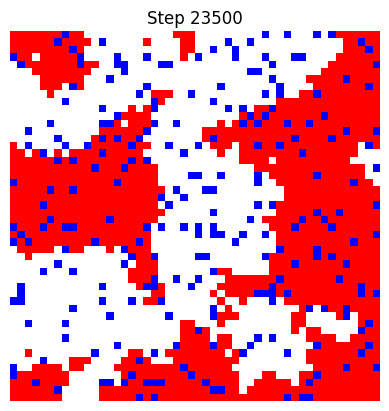

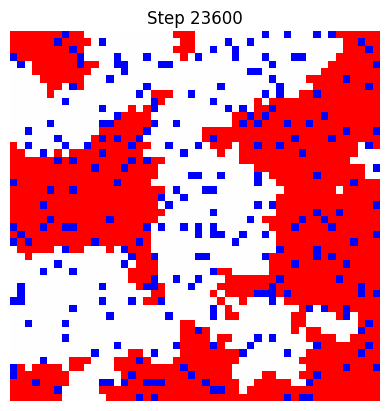

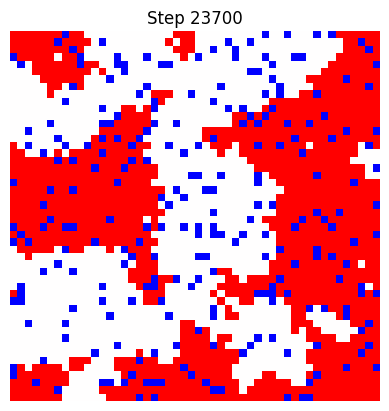

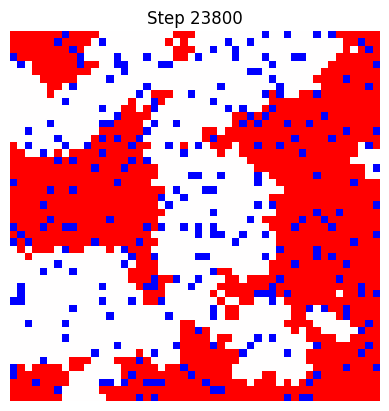

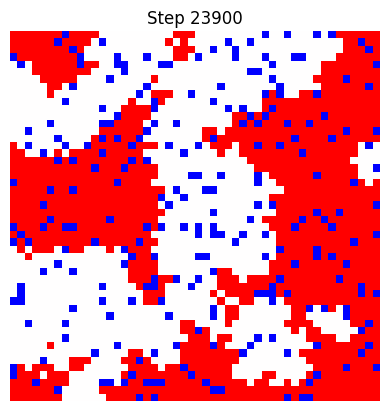

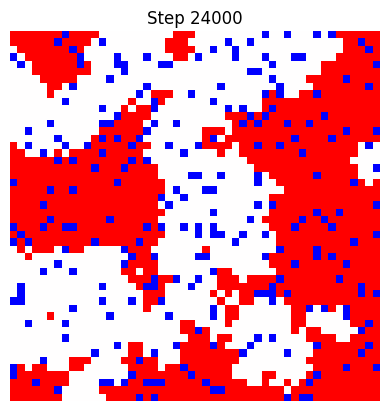

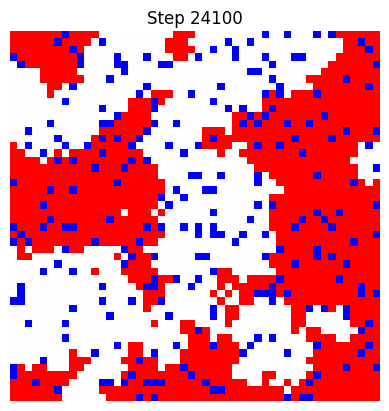

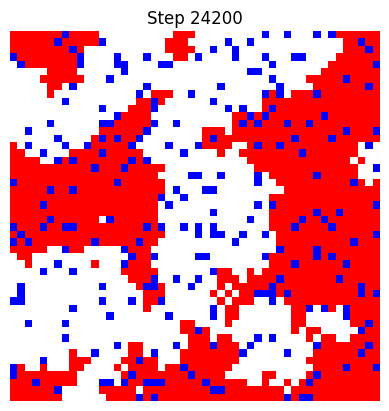

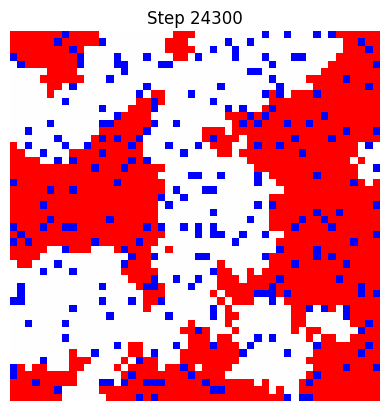

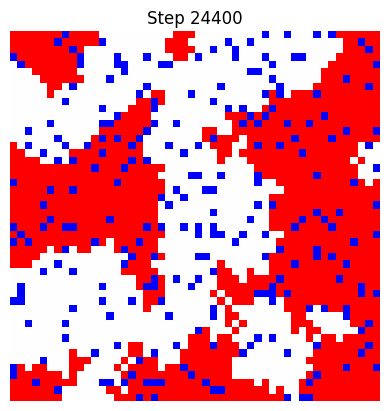

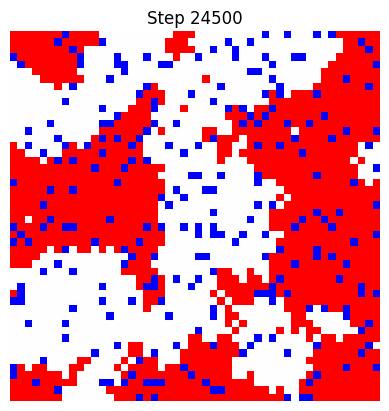

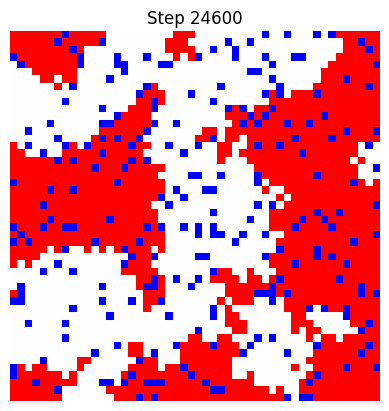

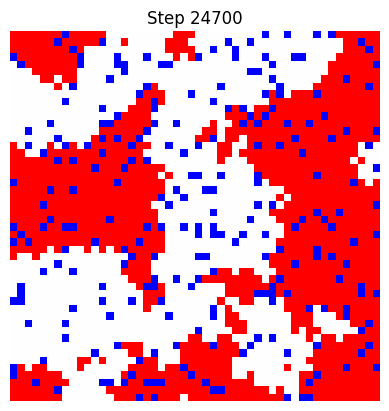

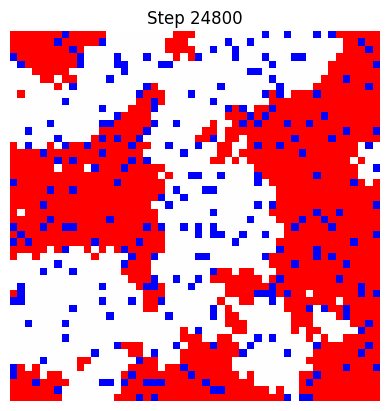

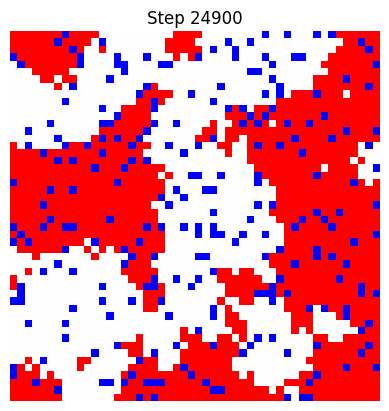

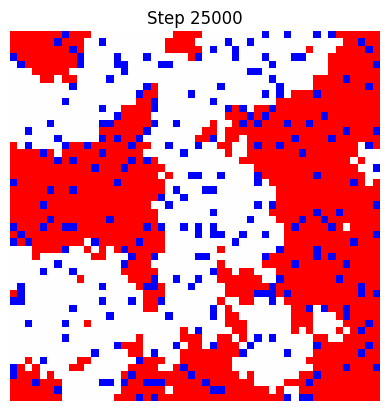

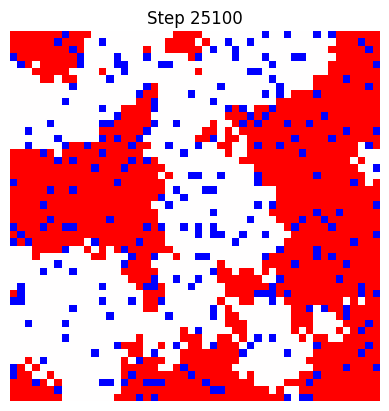

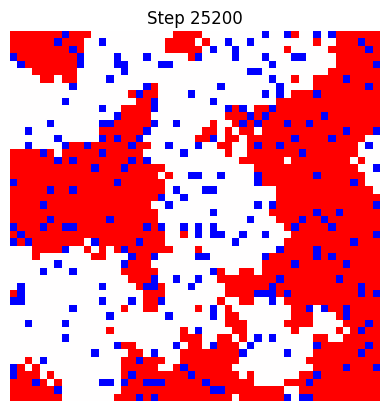

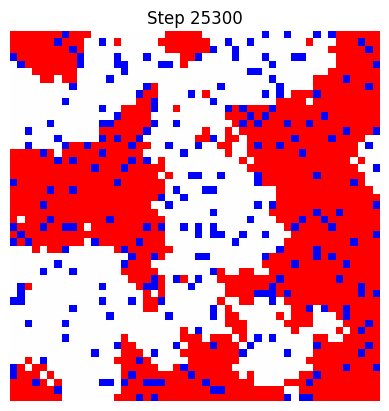

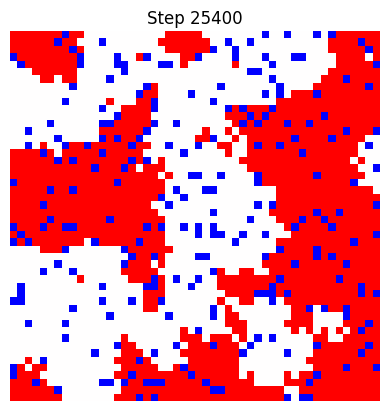

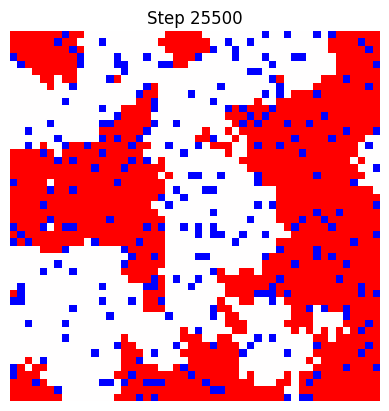

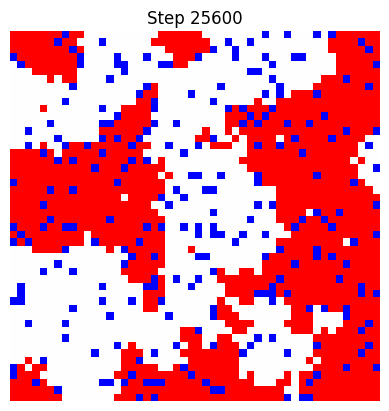

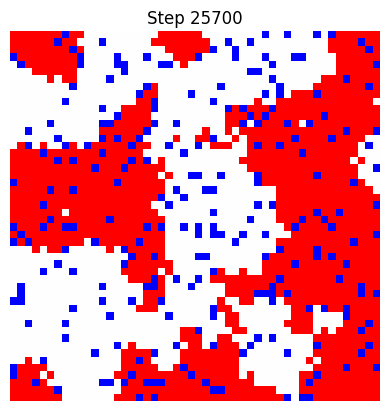

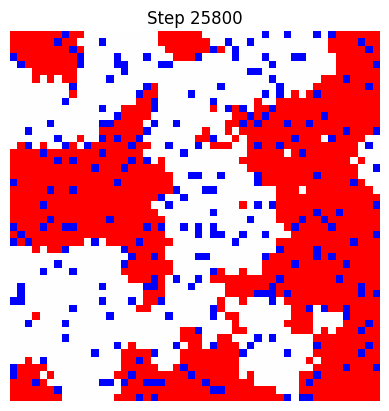

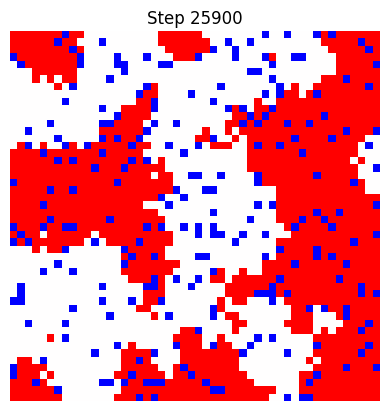

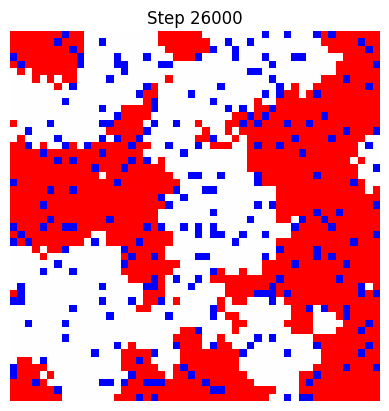

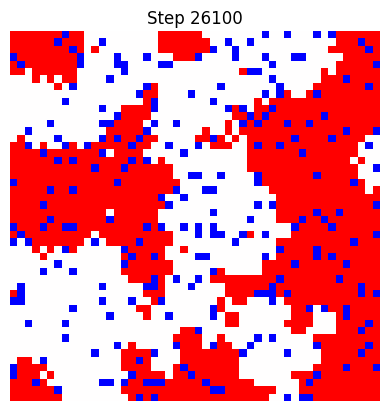

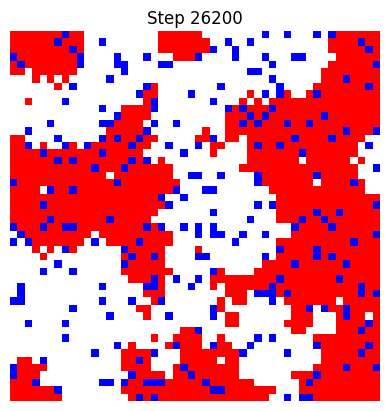

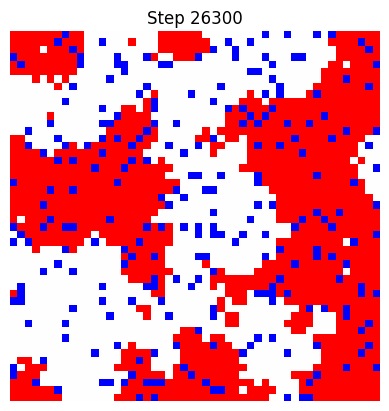

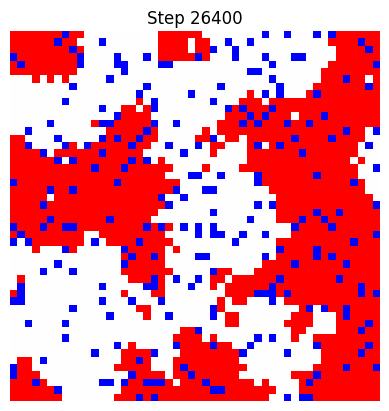

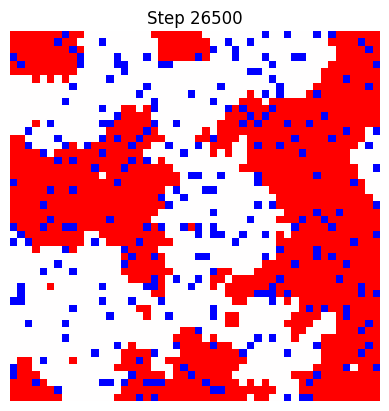

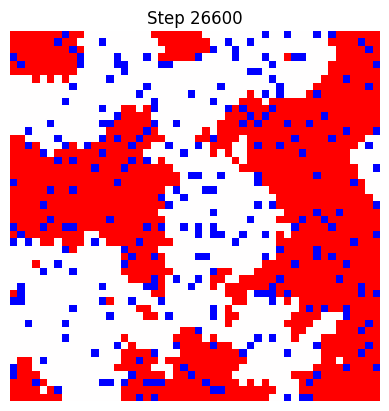

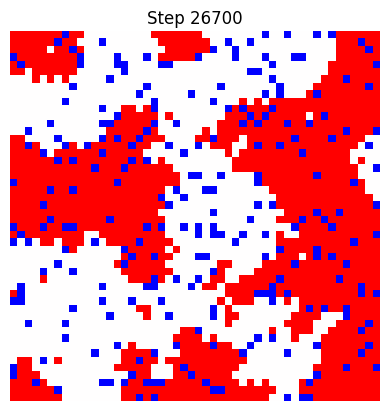

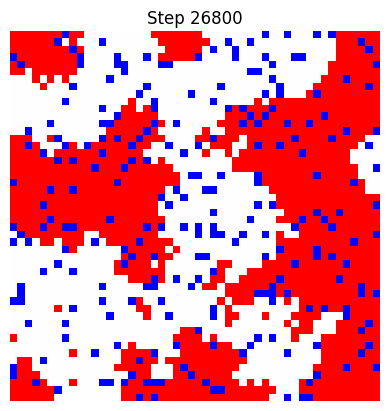

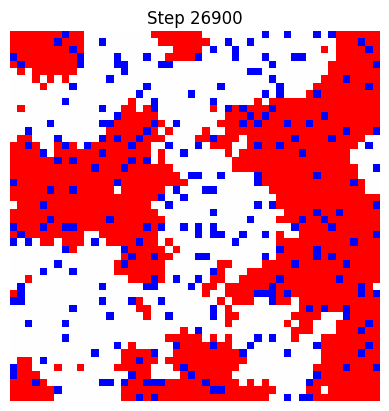

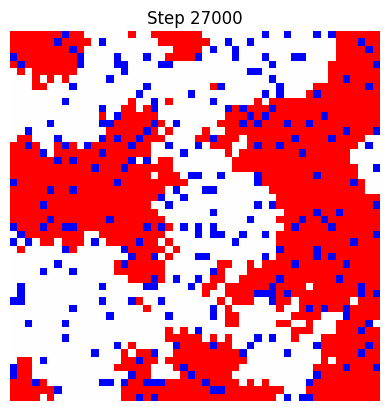

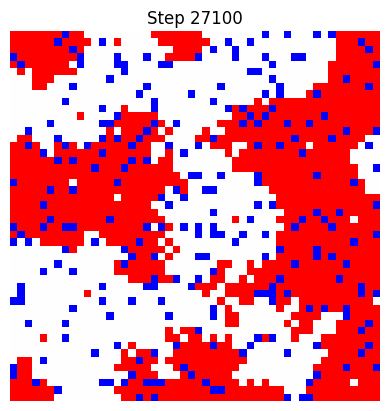

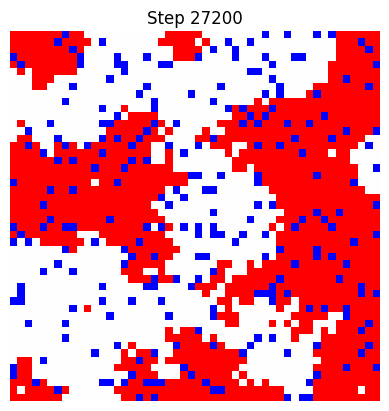

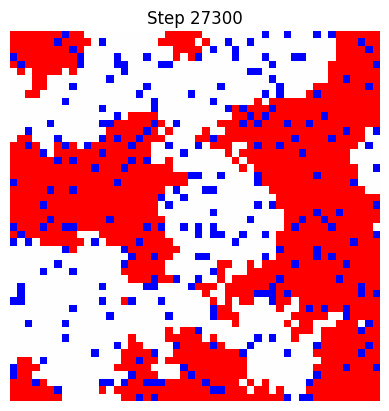

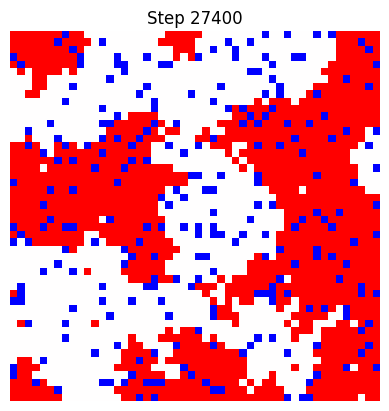

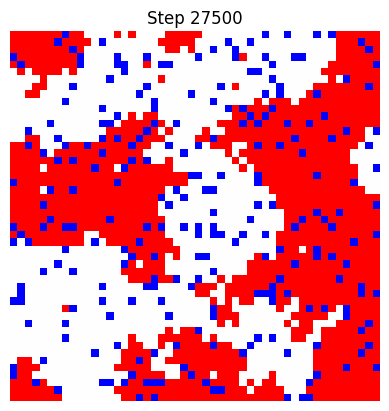

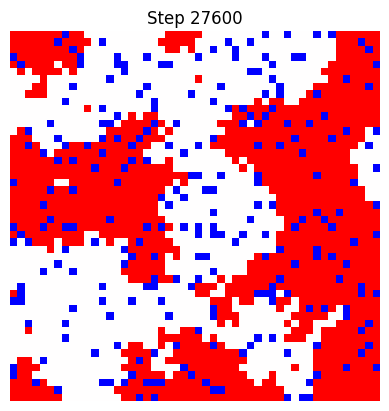

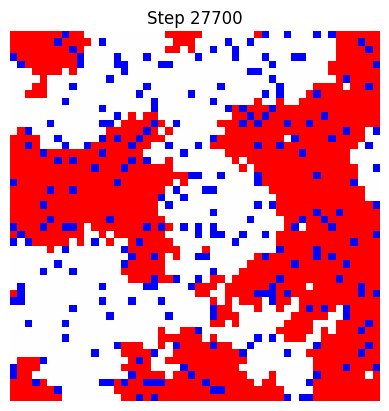

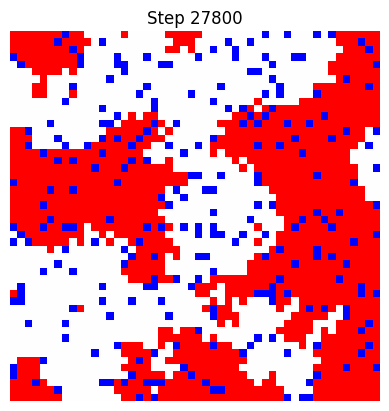

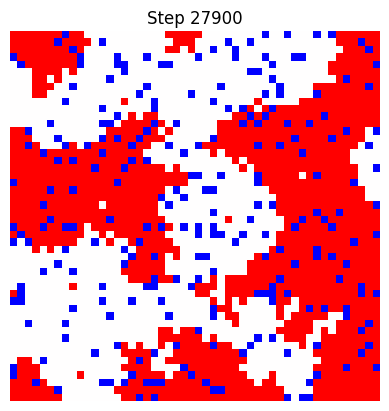

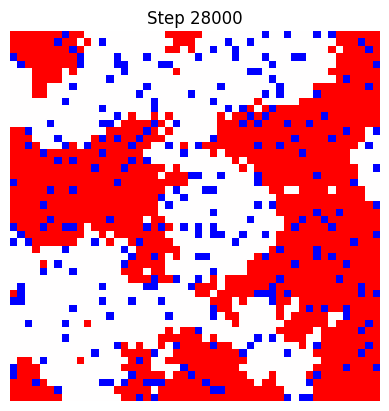

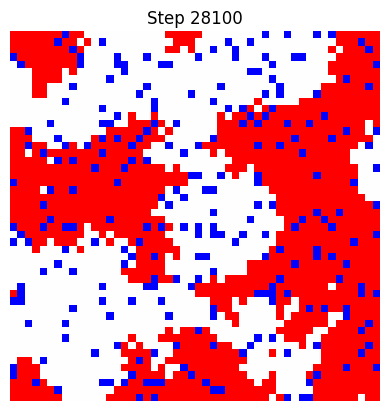

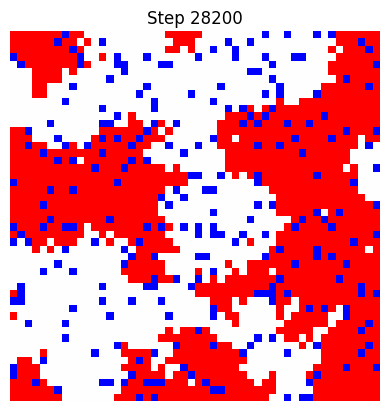

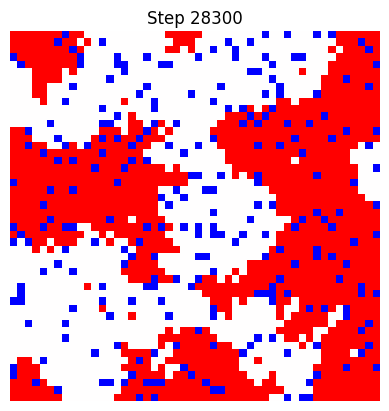

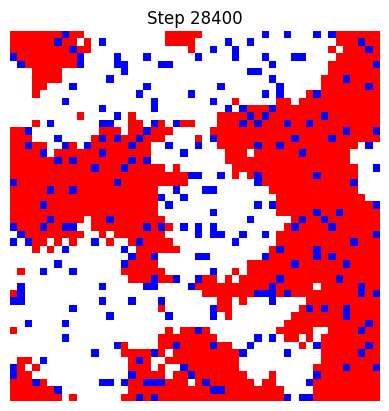

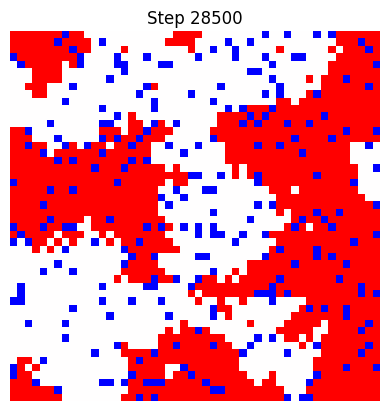

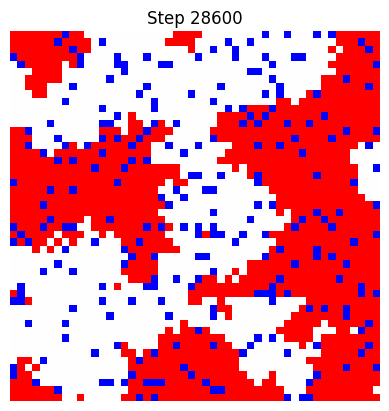

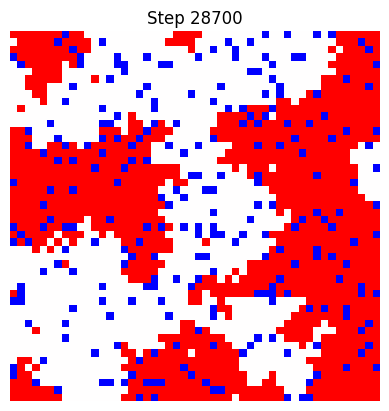

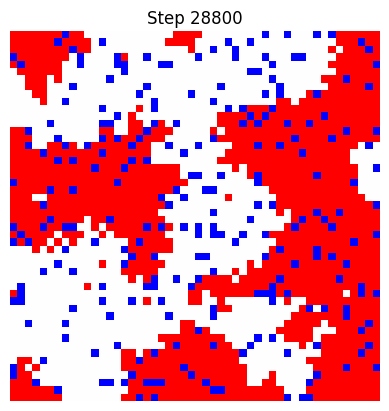

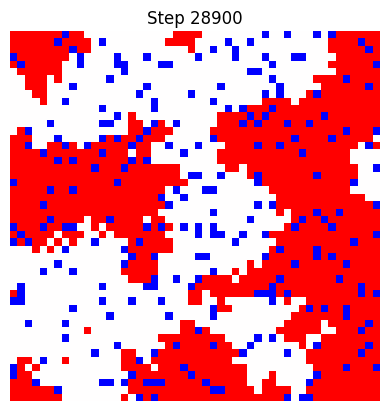

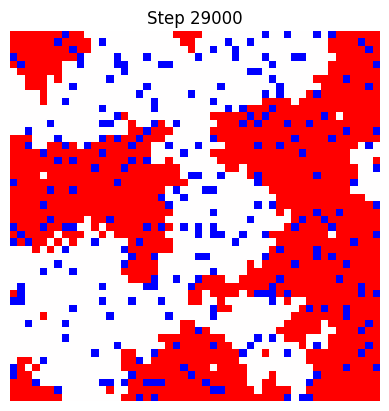

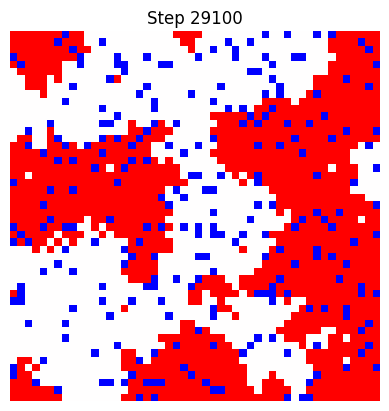

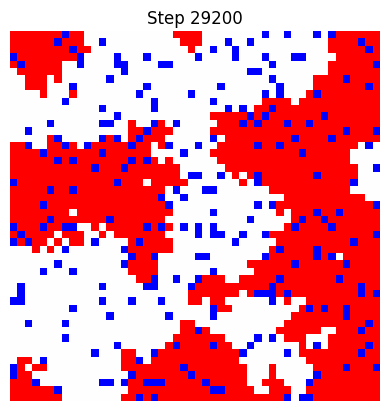

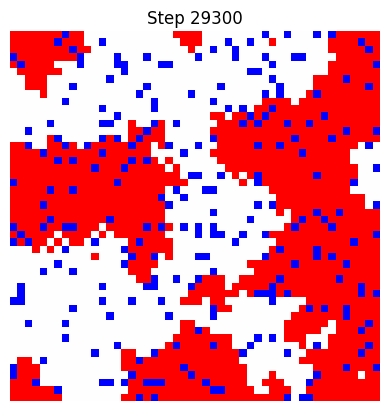

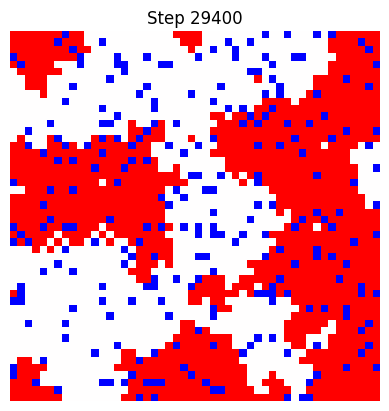

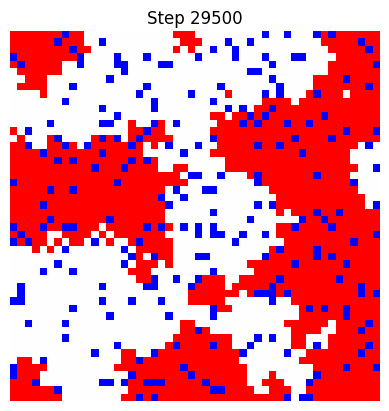

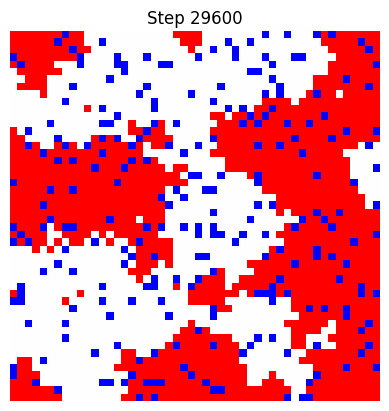

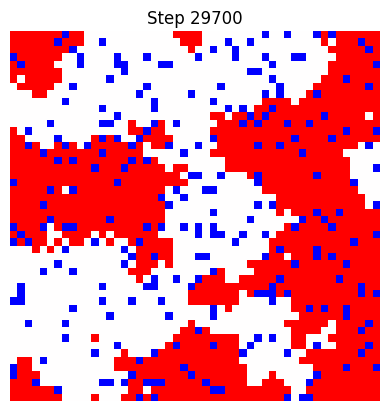

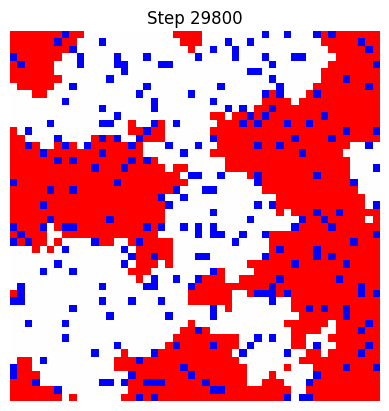

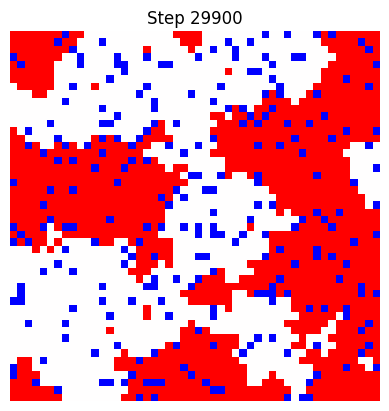

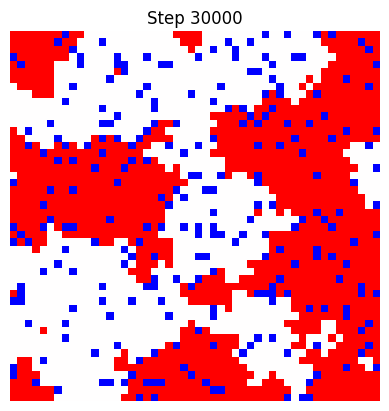

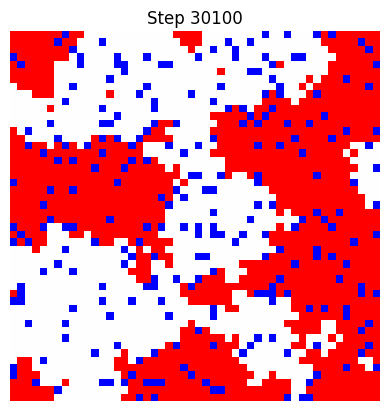

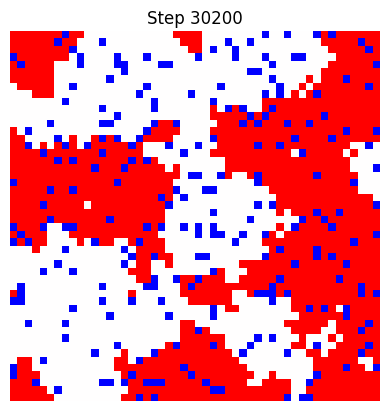

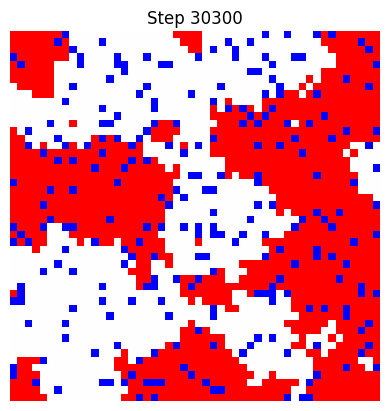

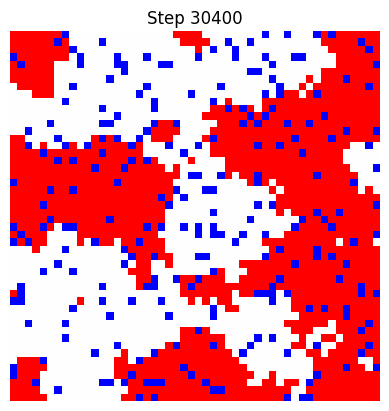

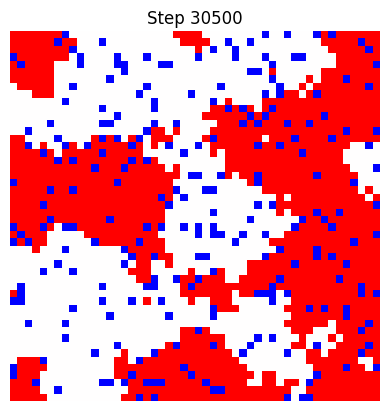

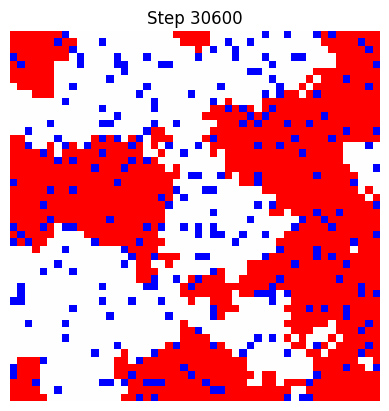

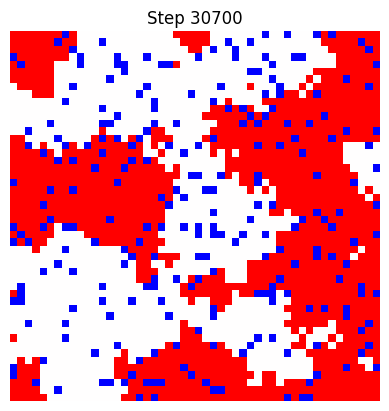

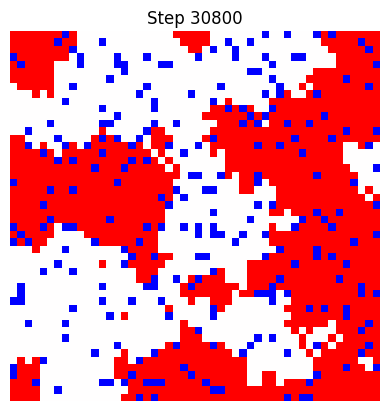

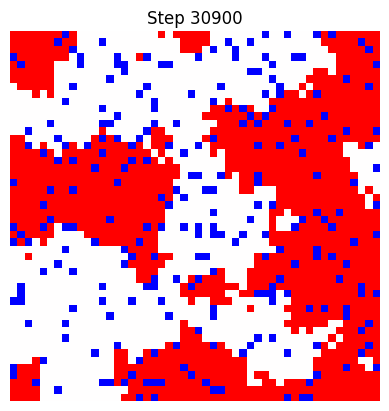

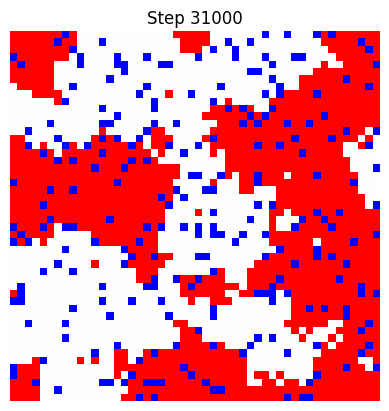

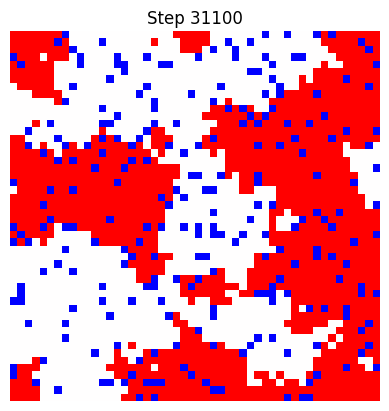

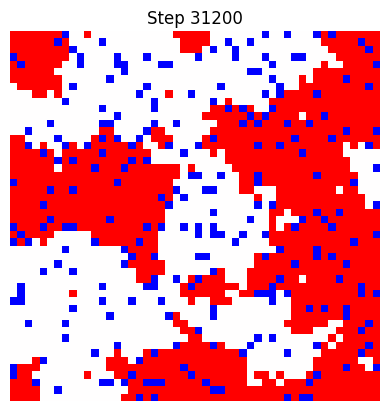

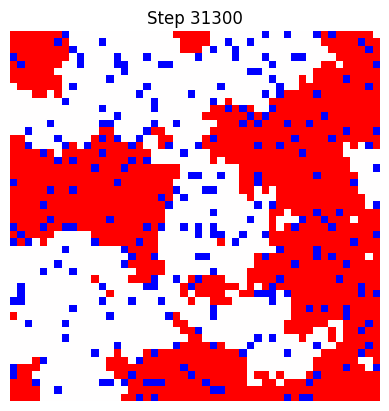

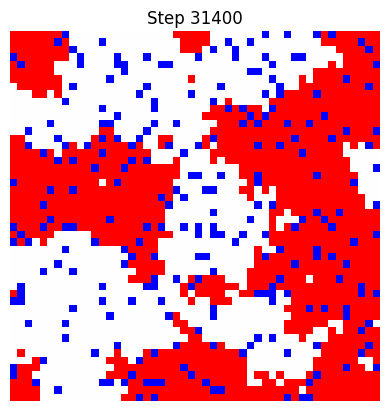

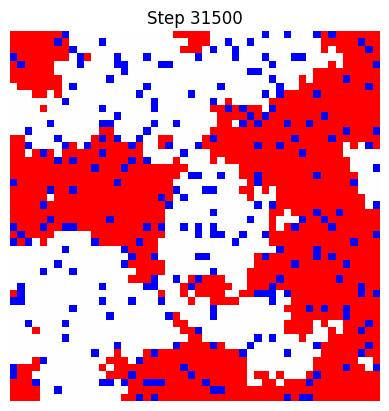

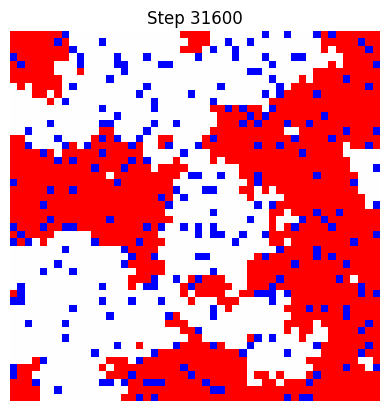

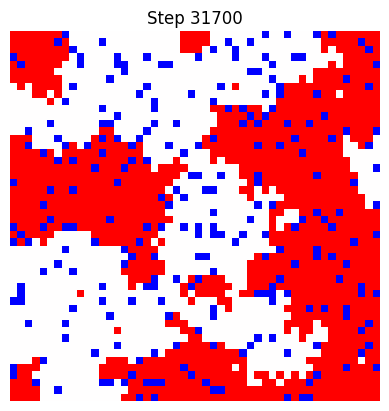

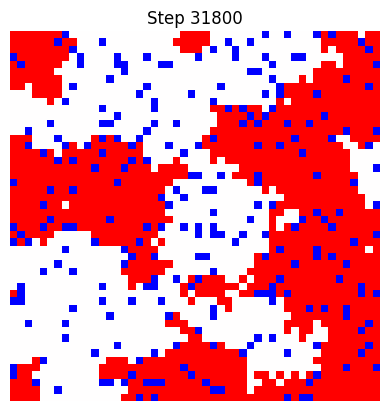

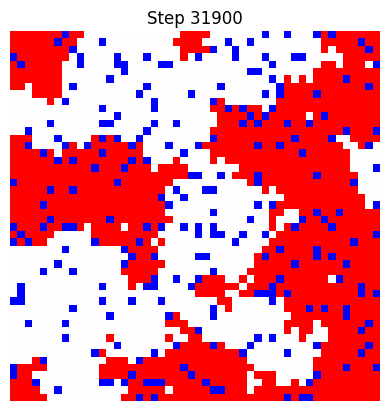

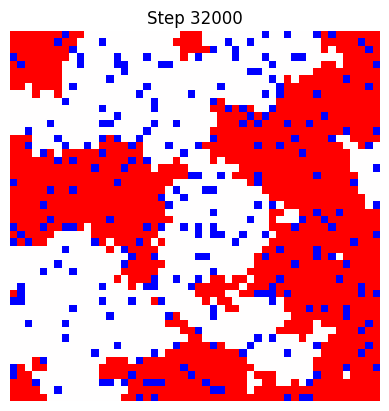

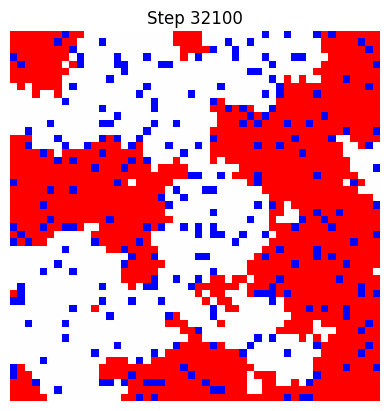

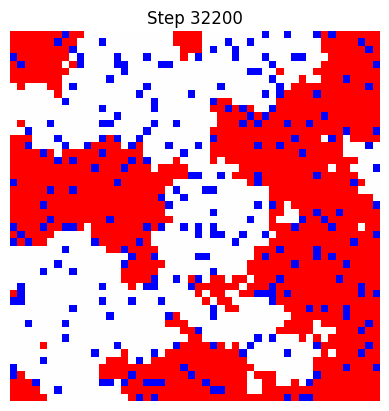

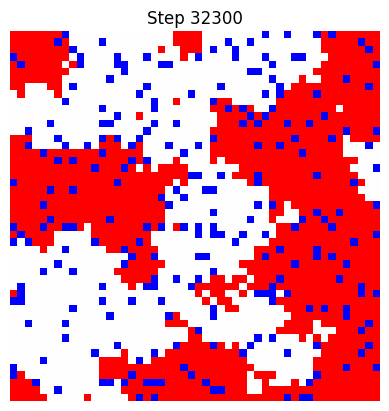

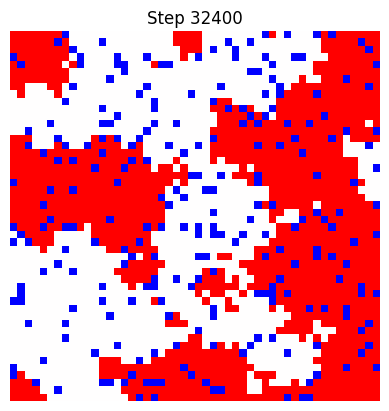

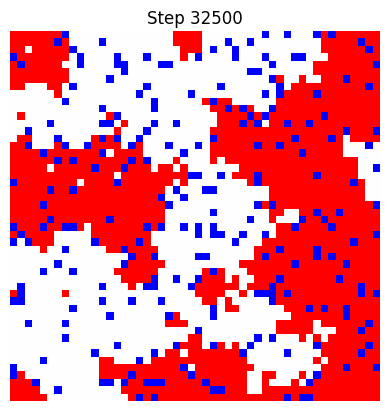

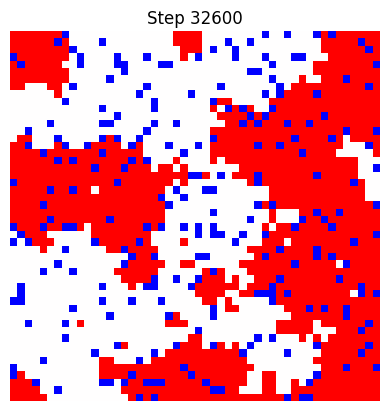

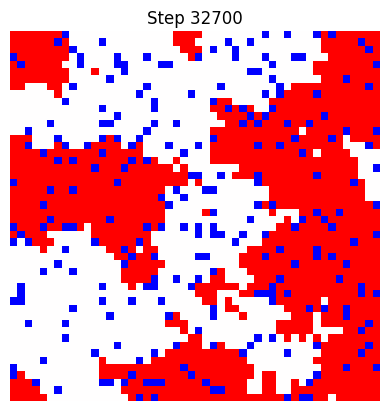

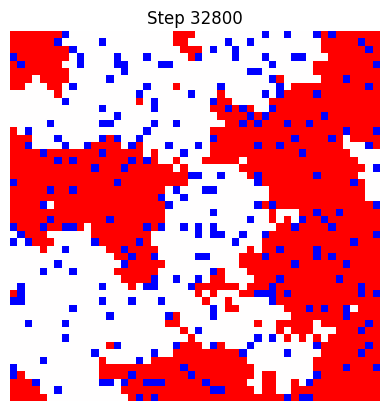

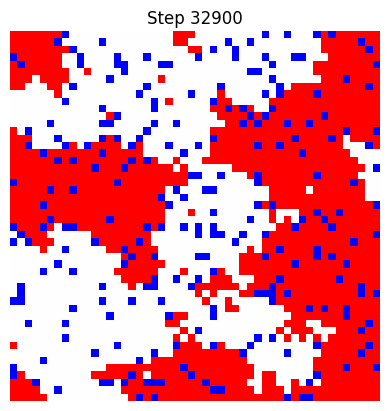

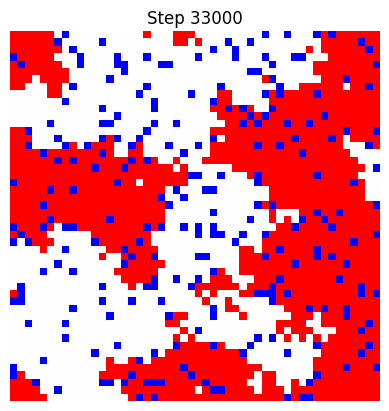

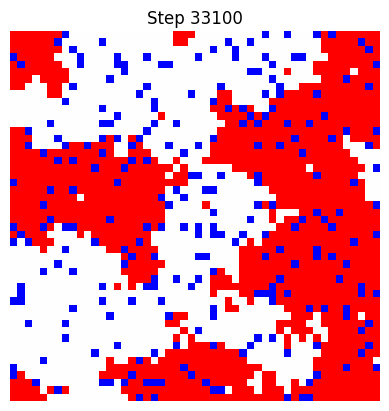

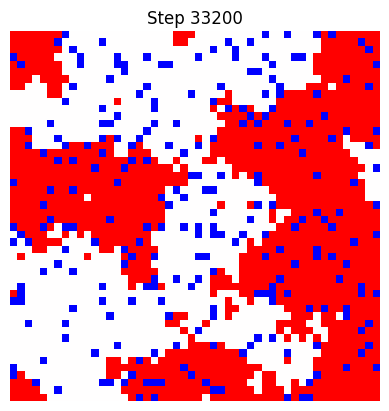

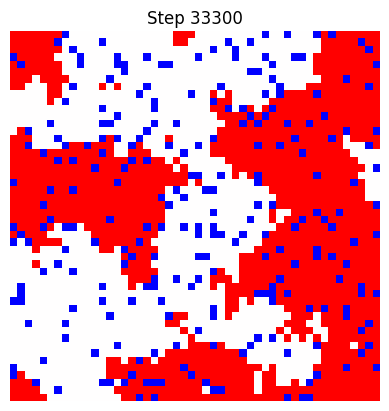

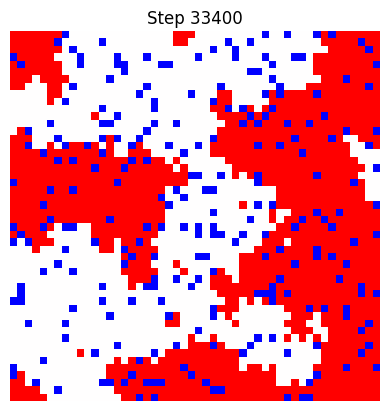

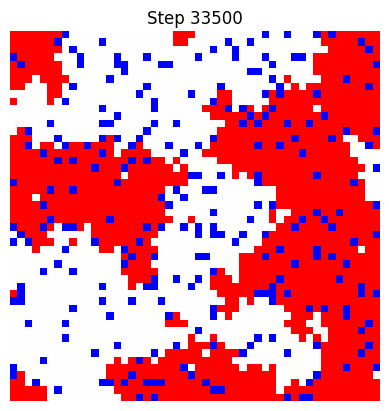

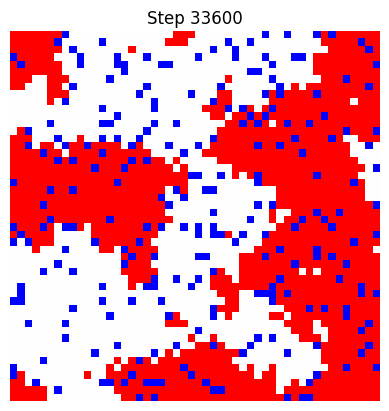

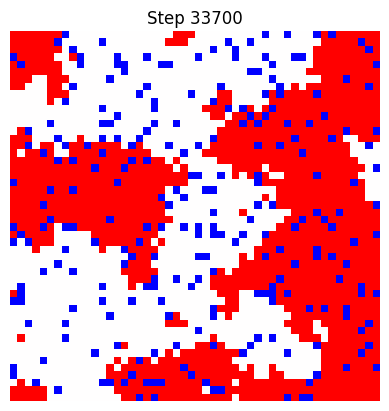

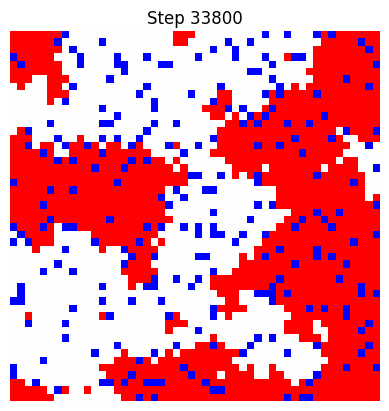

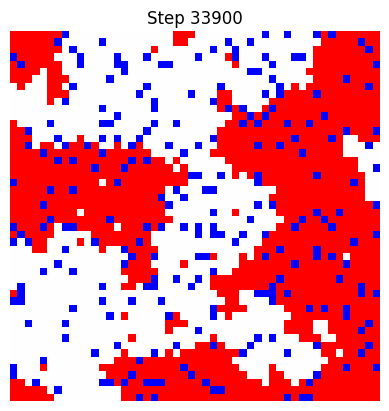

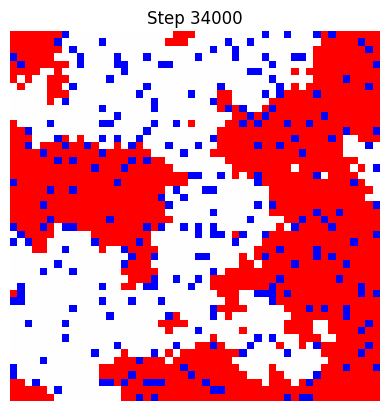

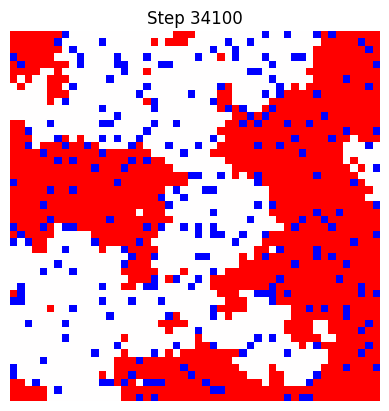

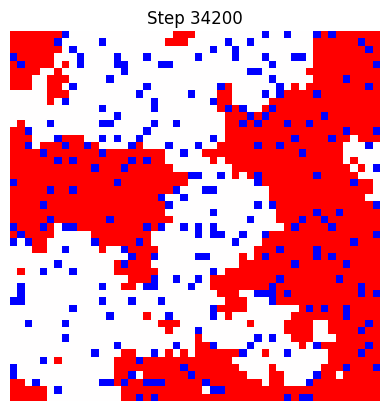

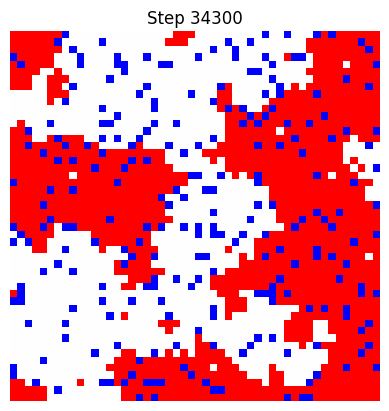

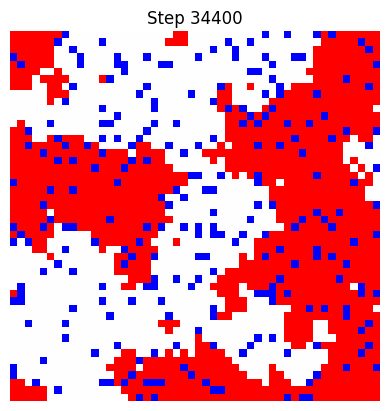

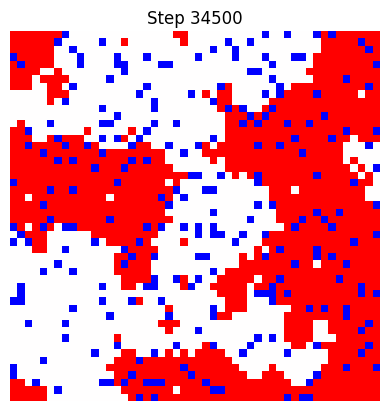

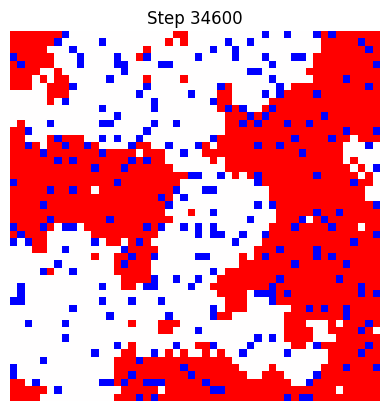

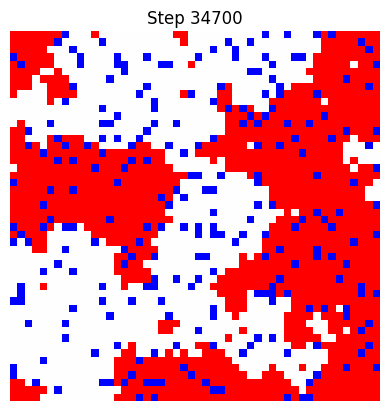

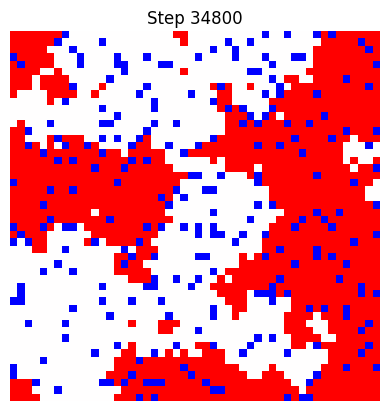

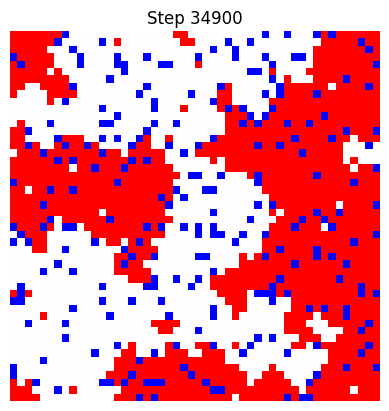

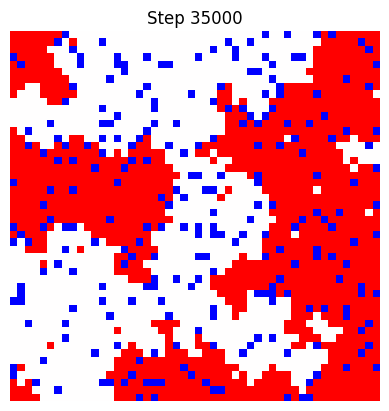

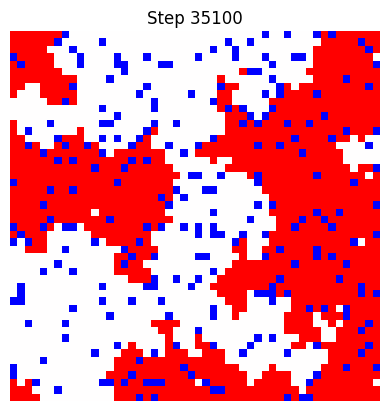

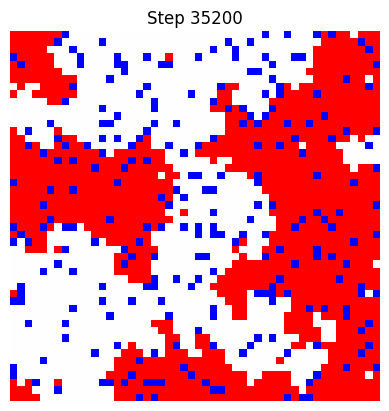

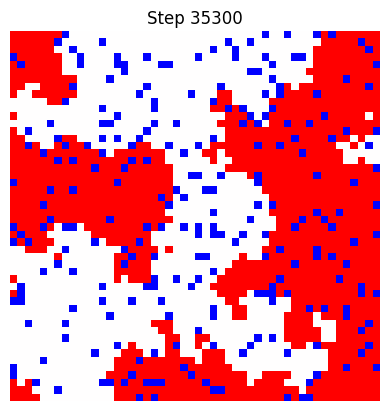

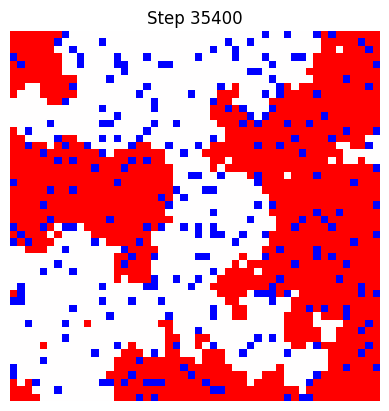

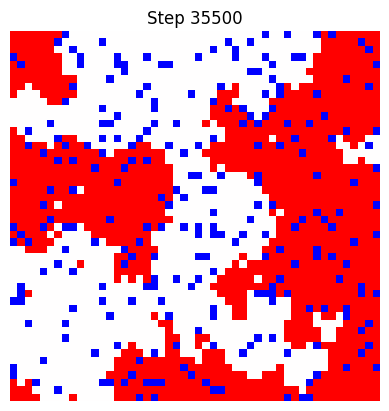

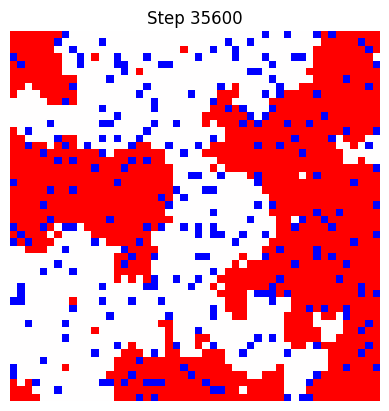

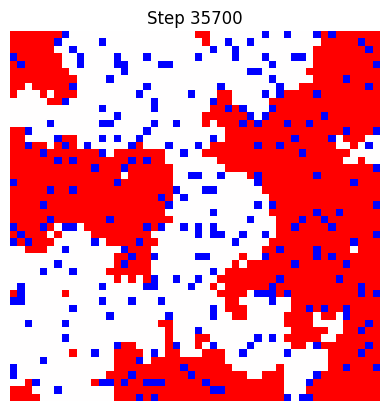

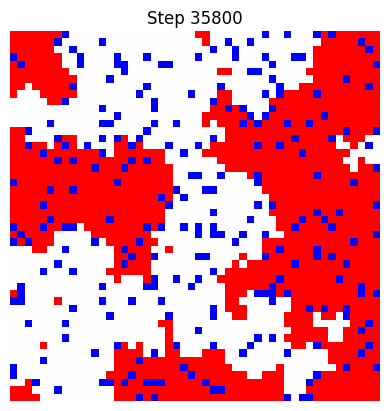

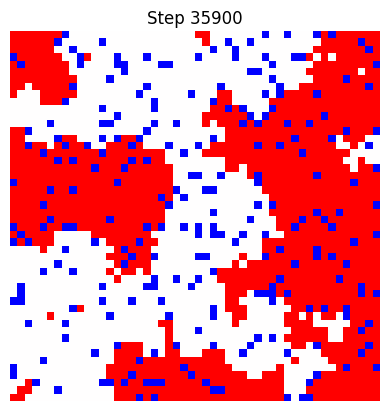

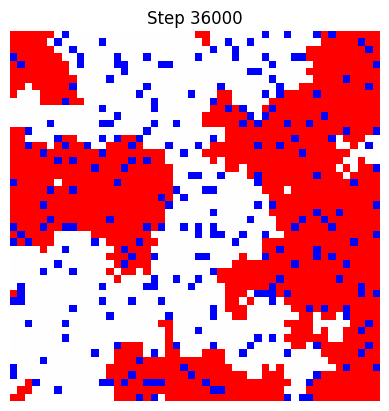

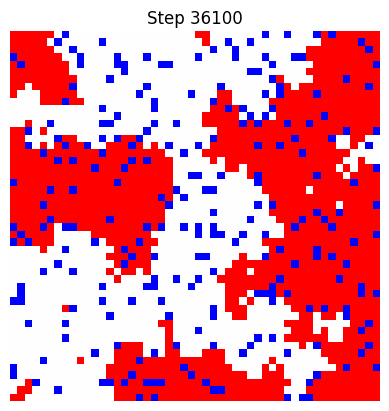

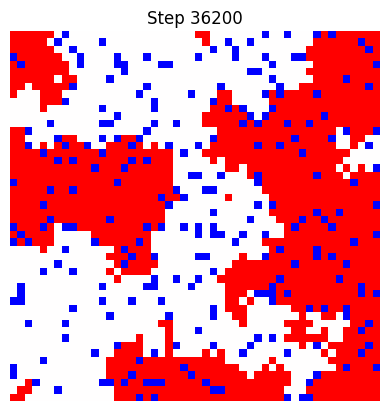

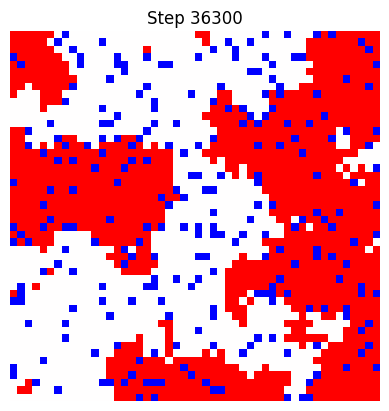

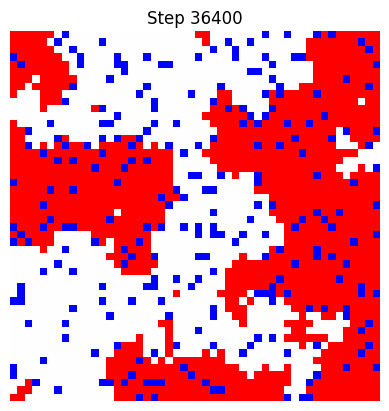

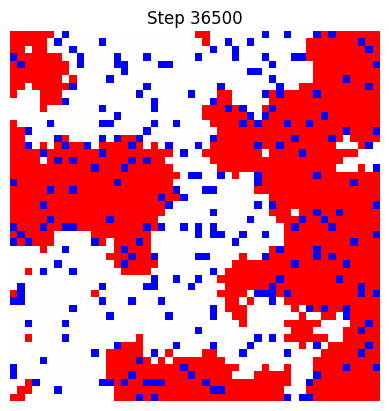

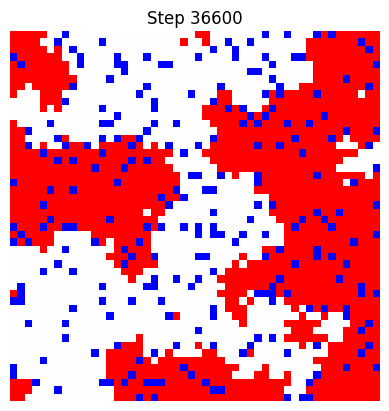

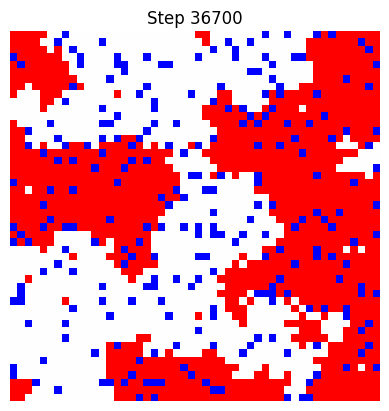

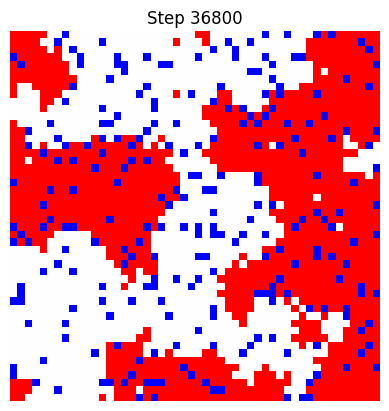

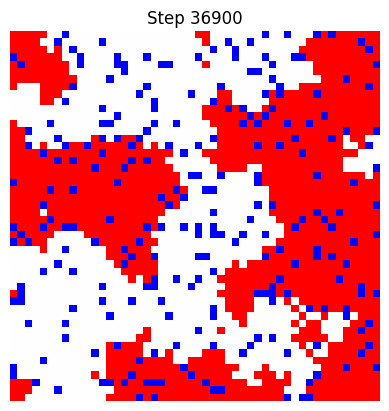

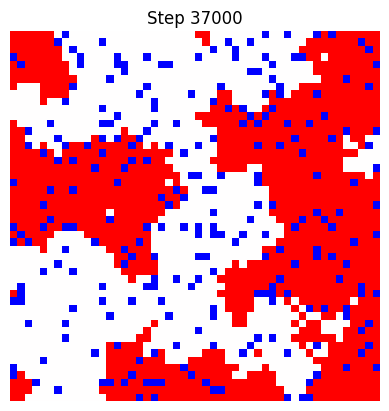

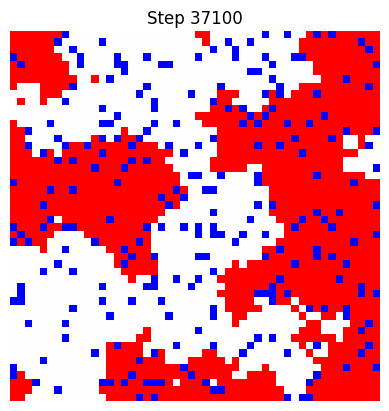

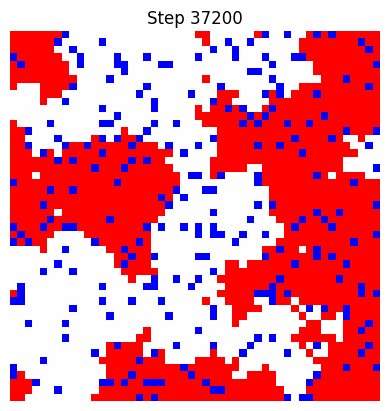

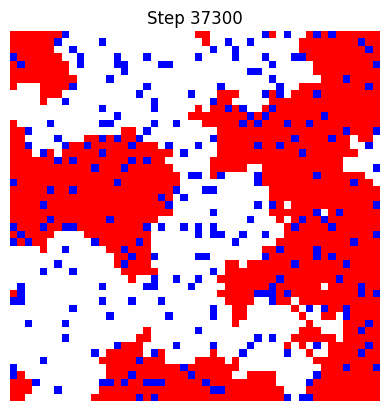

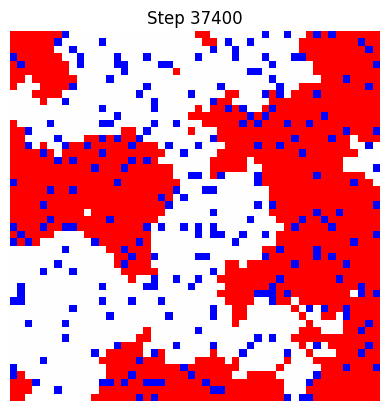

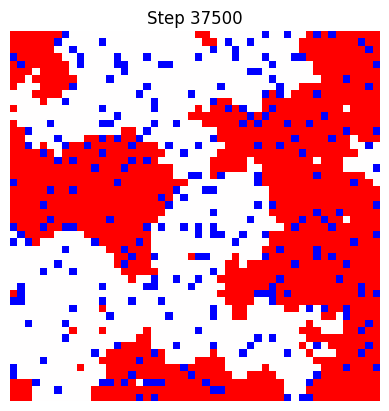

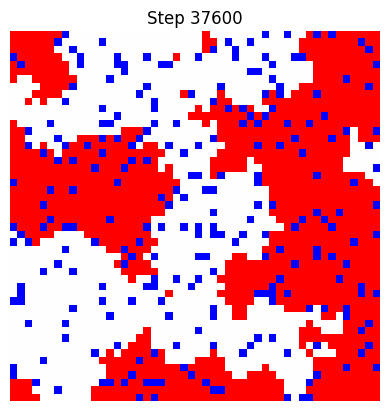

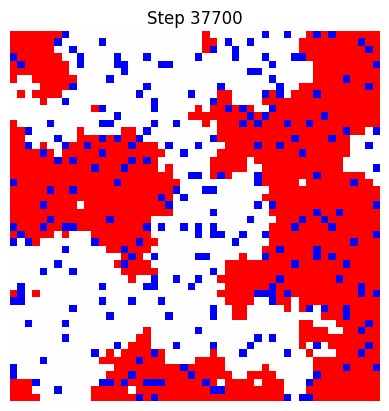

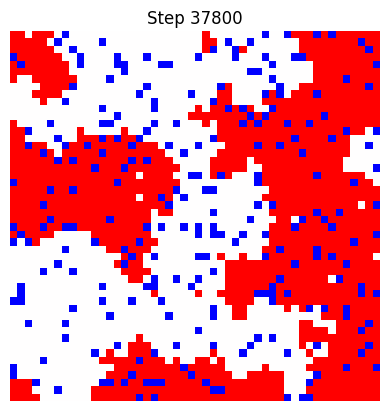

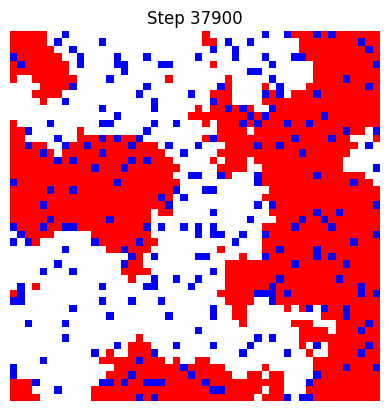

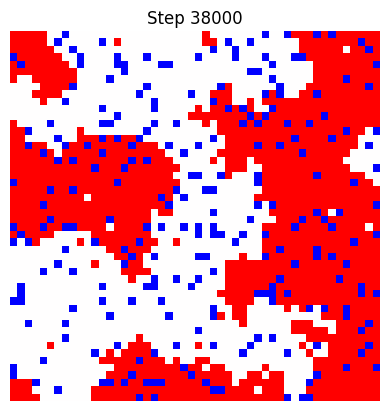

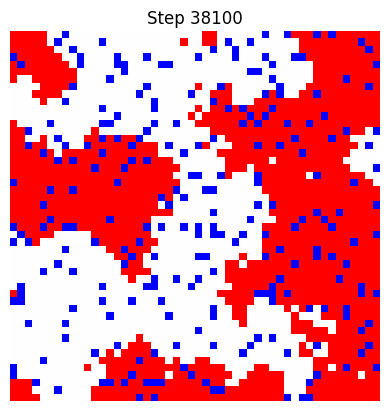

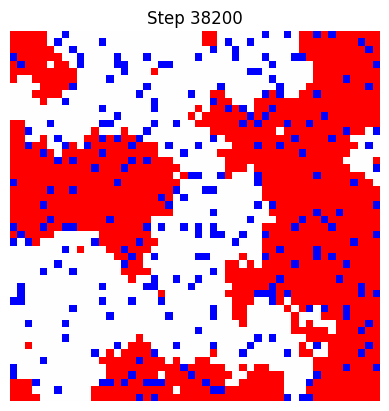

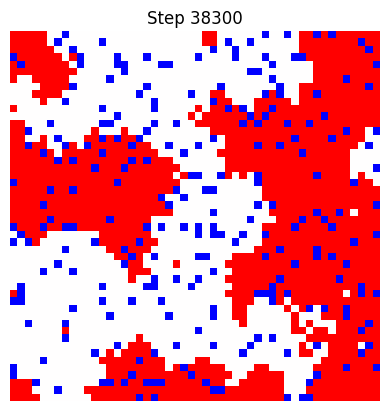

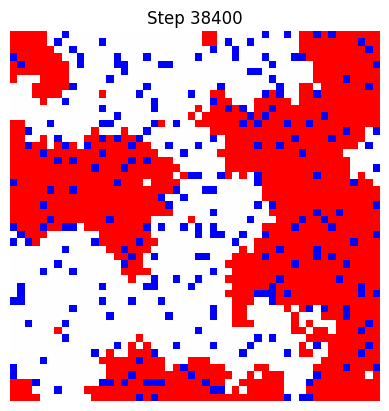

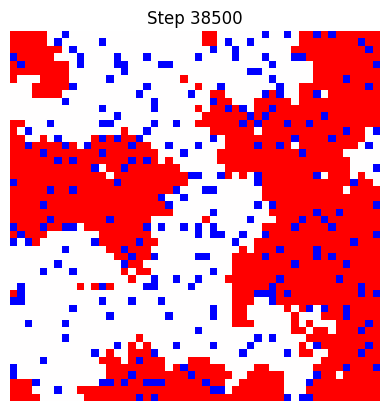

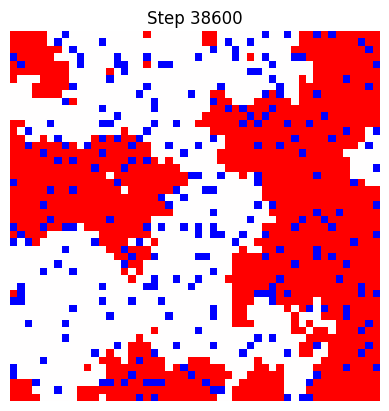

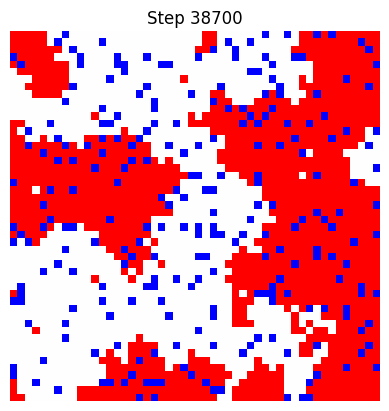

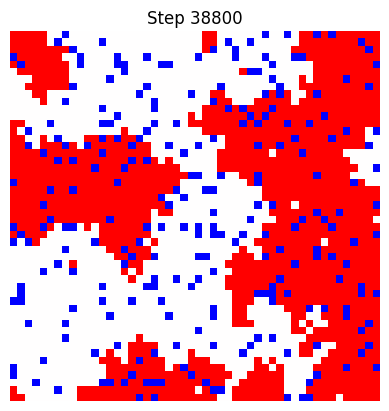

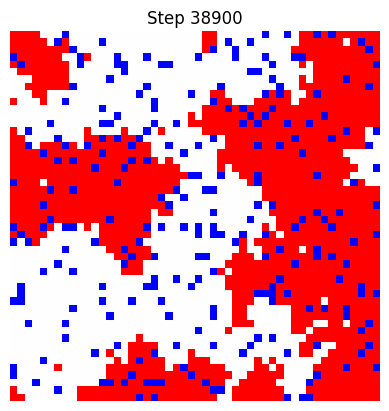

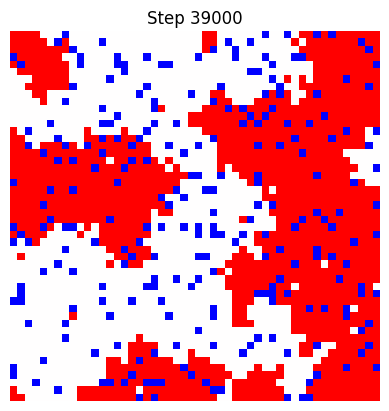

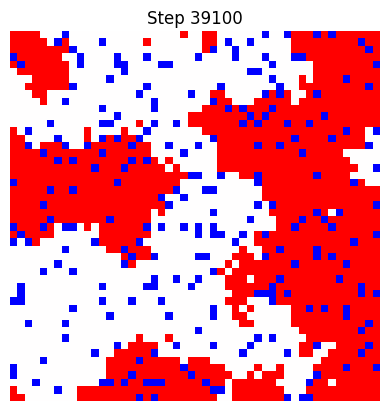

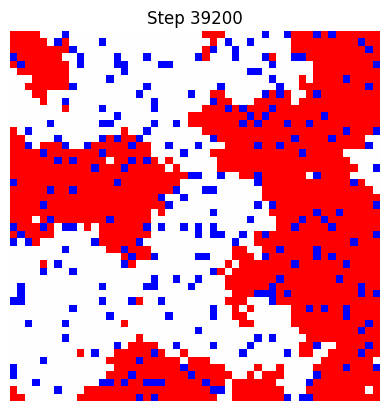

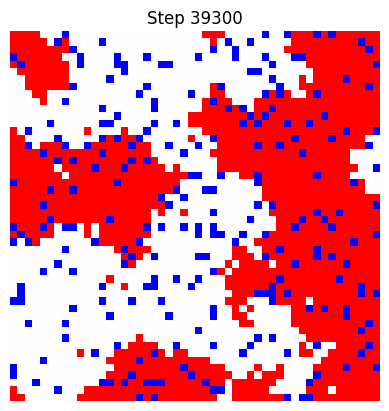

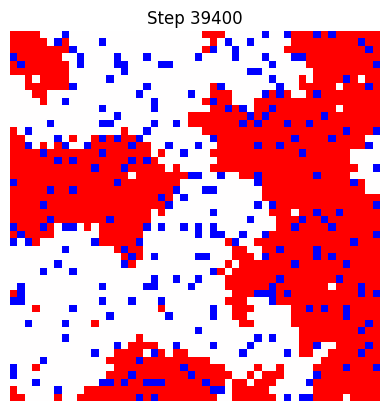

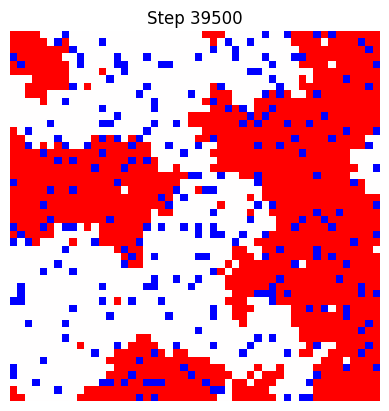

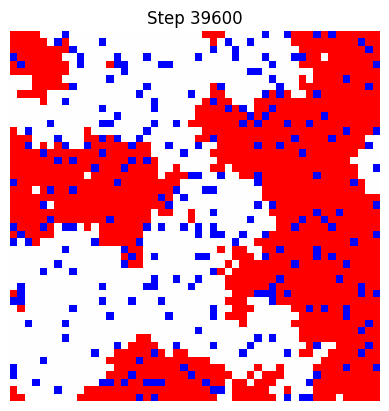

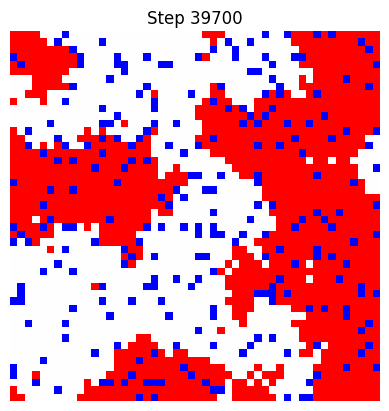

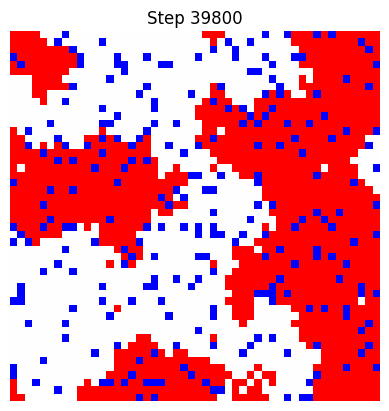

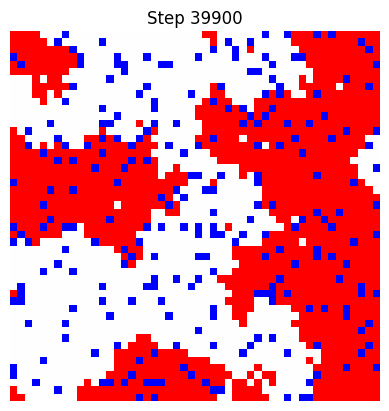

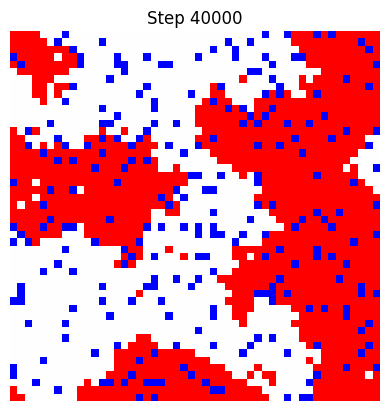

Несчастливые клетки: [(3, 6), (6, 31), (13, 3), (13, 15), (18, 45), (20, 3), (21, 9), (22, 3), (23, 1), (27, 0), (29, 21), (30, 23), (30, 32), (31, 14), (35, 0), (35, 17), (44, 40), (46, 48)]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Параметры модели
n = 50
blue_ratio = 0.45
red_ratio = 0.45
empty_ratio = 0.1
steps = 40000

# Инициализация сетки
def initialize_grid(n, blue_ratio, red_ratio, empty_ratio):
    total_cells = n * n
    num_blue = int(total_cells * blue_ratio)
    num_red = int(total_cells * red_ratio)
    num_empty = total_cells - num_blue - num_red
    grid = [0] * num_empty + [1] * num_blue + [2] * num_red
    np.random.shuffle(grid)
    return np.array(grid).reshape(n, n)

# Проверка "счастливости" клетки (ровно два соседа того же цвета)
def is_happy(grid, x, y):
    color = grid[x, y]
    if color == 0:
        return True

    # Получаем соседей клетки
    neighbors = grid[max(0, x-1):min(n, x+2), max(0, y-1):min(n, y+2)]
    same_color_neighbors = np.sum(neighbors == color) - 1

    return same_color_neighbors   >= 2

# Перемещение одной "несчастной" клетки
def move_unhappy_cell(grid):
    empty_cells = set(zip(*np.where(grid == 0)))
    unhappy_cells = [(x, y) for x in range(n) for y in range(n) if not is_happy(grid, x, y) and grid[x, y] != 0]

    if not unhappy_cells:
        return grid, False

    cell_to_move = random.choice(unhappy_cells)
    x, y = cell_to_move

    # Нахождение всех возможных перемещений в пределах сетки, избегая пустых клеток
    possible_moves = [(i, j) for i in range(n) for j in range(n) if grid[i, j] == 0 or grid[i, j] != grid[x, y]]
    possible_moves = [move for move in possible_moves if move not in empty_cells]

    if not possible_moves:
        return grid, False

    # Случайный выбор новой позиции для несчастной клетки
    new_position = random.choice(possible_moves)

    # Перемещение клетки в новое положение
    grid[new_position], grid[x, y] = grid[x, y], grid[new_position]
    return grid, True

# Отображение сетки
def plot_grid(grid, step):
    plt.imshow(grid, cmap='bwr', vmin=0, vmax=2)
    plt.title(f'Step {step}')
    plt.axis('off')
    plt.show()

# Моделирование
grid = initialize_grid(n, blue_ratio, red_ratio, empty_ratio)
step = 0

while step < steps:
    grid, moved = move_unhappy_cell(grid)
    step += 1

    if step % 100 == 0:
        plot_grid(grid, step)

    # Проверка, все ли клетки счастливы
    all_happy = all(is_happy(grid, x, y) for x in range(n) for y in range(n) if grid[x, y] != 0)
    if all_happy:
        print(f"Моделирование стабилизровалось и все ячейки счастливы на этапе: {step}")
        plot_grid(grid, step)
        break

# Дополнительная проверка: вывод координат несчастных клеток
unhappy_cells = [(x, y) for x in range(n) for y in range(n) if not is_happy(grid, x, y) and grid[x, y] != 0]
if unhappy_cells:
    print("Несчастливые клетки:", unhappy_cells)
else:
    print("Все клетки счастливы")
